# **Bitcoin Prices Using Machine Learning**

The goal of this project is to predict the future price movements of Bitcoin using machine learning techniques. The researchers compiled a dataset of 24 potential explanatory variables, including past Bitcoin prices, other cryptocurrency prices, exchange rates, and macroeconomic factors.

- **NumPy (`import numpy as np`)**: NumPy is used for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

- **Pandas (`import pandas as pd`)**: Pandas is a powerful library for data manipulation and analysis. It provides data structures like DataFrames and Series, which are ideal for working with structured data.

- **Matplotlib (`import matplotlib.pyplot as plt`)**: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. `pyplot` is Matplotlib's scripting interface, which provides a MATLAB-like way of plotting.

- **Seaborn (`import seaborn as sns`)**: Seaborn is built on top of Matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics. It simplifies the process of creating common visualization types like heatmaps, histograms, and regression plots.

Together, these libraries form the backbone of data analysis and visualization tasks in Python, offering functionalities from data cleaning and manipulation to plotting insightful graphs and charts.

In [ ]:
# Importing NumPy for numerical operations
import numpy as np

# Importing Pandas for data manipulation and analysis
import pandas as pd

# Importing Matplotlib's pyplot module for plotting
import matplotlib.pyplot as plt

# Importing Seaborn for enhanced statistical plotting
import seaborn as sns

Bitcoin's historical data for insightful analysis and predictions. [Click Here](https://www.coingecko.com/en/coins/bitcoin/historical_data?start=2023-06-29&end=2024-06-28) to download the data.

In [ ]:
data = pd.read_csv('btc-usd-max.csv')  # Reading the CSV file 'btc-usd-max.csv' into a Pandas DataFrame named 'data'
data

,snapped_at,price,market_cap,total_volume
0,2013-04-28 00:00:00 UTC,135.300000,1.500518e+09,0.000000e+00
1,2013-04-29 00:00:00 UTC,141.960000,1.575032e+09,0.000000e+00
2,2013-04-30 00:00:00 UTC,135.300000,1.501657e+09,0.000000e+00
3,2013-05-01 00:00:00 UTC,117.000000,1.298952e+09,0.000000e+00
4,2013-05-02 00:00:00 UTC,103.430000,1.148668e+09,0.000000e+00
...,...,...,...,...
4073,2024-06-24 00:00:00 UTC,63221.357384,1.248189e+12,1.074827e+10
4074,2024-06-25 00:00:00 UTC,60363.234975,1.188965e+12,4.203655e+10
4075,2024-06-26 00:00:00 UTC,61770.413870,1.217935e+12,2.110556e+10
4076,2024-06-27 00:00:00 UTC,60749.896194,1.198205e+12,2.290854e+10


In [ ]:
data.drop(columns=['market_cap', 'total_volume'], inplace=True)  # Dropping the columns 'market_cap' and 'total_volume' from the DataFrame 'data'
data

,snapped_at,price
0,2013-04-28 00:00:00 UTC,135.300000
1,2013-04-29 00:00:00 UTC,141.960000
2,2013-04-30 00:00:00 UTC,135.300000
3,2013-05-01 00:00:00 UTC,117.000000
4,2013-05-02 00:00:00 UTC,103.430000
...,...,...
4073,2024-06-24 00:00:00 UTC,63221.357384
4074,2024-06-25 00:00:00 UTC,60363.234975
4075,2024-06-26 00:00:00 UTC,61770.413870
4076,2024-06-27 00:00:00 UTC,60749.896194


In [ ]:
data.info()  # Displaying concise summary information about the DataFrame 'data', including column names, data types, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078 entries, 0 to 4077
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   snapped_at  4078 non-null   object 
 1   price       4078 non-null   float64
dtypes: float64(1), object(1)
memory usage: 63.8+ KB


In [ ]:
data.rename(columns={'snapped_at':'date'}, inplace=True)  # Renaming the column 'snapped_at' to 'date' in the DataFrame 'data'
data

,date,price
0,2013-04-28 00:00:00 UTC,135.300000
1,2013-04-29 00:00:00 UTC,141.960000
2,2013-04-30 00:00:00 UTC,135.300000
3,2013-05-01 00:00:00 UTC,117.000000
4,2013-05-02 00:00:00 UTC,103.430000
...,...,...
4073,2024-06-24 00:00:00 UTC,63221.357384
4074,2024-06-25 00:00:00 UTC,60363.234975
4075,2024-06-26 00:00:00 UTC,61770.413870
4076,2024-06-27 00:00:00 UTC,60749.896194


In [ ]:
data['date'] = pd.to_datetime(data['date'])  # Converting the 'date' column in the DataFrame 'data' to datetime format
data

,date,price
0,2013-04-28 00:00:00+00:00,135.300000
1,2013-04-29 00:00:00+00:00,141.960000
2,2013-04-30 00:00:00+00:00,135.300000
3,2013-05-01 00:00:00+00:00,117.000000
4,2013-05-02 00:00:00+00:00,103.430000
...,...,...
4073,2024-06-24 00:00:00+00:00,63221.357384
4074,2024-06-25 00:00:00+00:00,60363.234975
4075,2024-06-26 00:00:00+00:00,61770.413870
4076,2024-06-27 00:00:00+00:00,60749.896194


In [ ]:
def draw_plot(data):
    # Make sure column 'date' is in datetime format
    data['date'] = pd.to_datetime(data['date'])

    # Create a 'year' column to store the year of each day
    data['year'] = data['date'].dt.year

    # Calculate mean and variance for each year
    mean_by_year = data.groupby('year')['price'].mean()
    variance_by_year = data.groupby('year')['price'].var()

    # Draw a chart
    plt.figure(figsize=(20, 6))

    # Plot the original data
    plt.plot(data['date'], data['price'], c='orange', label='True values')

    # Draw the mean and variance for each year
    for year, mean in mean_by_year.items():
        plt.plot(data[data['year'] == year]['date'], [mean] * len(data[data['year'] == year]['date']), color='r', linestyle='--', label=f'Mean - {year}')

    for year, variance in variance_by_year.items():
        plt.plot(data[data['year'] == year]['date'], [mean_by_year[year] + np.sqrt(variance)] * len(data[data['year'] == year]['date']), color='g', linestyle='--', label=f'Mean + Variance - {year}')
        plt.plot(data[data['year'] == year]['date'], [mean_by_year[year] - np.sqrt(variance)] * len(data[data['year'] == year]['date']), color='g', linestyle='--', label=f'Mean - Variance - {year}')

    # Chart configuration
    plt.xlabel("Date", fontsize=16)
    plt.ylabel("Price", fontsize=16)
    plt.title("BTC Price with Mean and Variance by Year", fontsize=16)
    plt.show()

### Explanation:

1. **Data Preparation:**
   - `data['date'] = pd.to_datetime(data['date'])`: Converts the 'date' column to datetime format if it's not already.
   - `data['year'] = data['date'].dt.year`: Extracts the year from the 'date' column and stores it in a new column 'year'.

2. **Calculating Mean and Variance:**
   - `mean_by_year = data.groupby('year')['price'].mean()`: Calculates the mean price for each year using `groupby` on the 'year' column.
   - `variance_by_year = data.groupby('year')['price'].var()`: Calculates the variance of prices for each year using `groupby` on the 'year' column.

3. **Plotting:**
   - `plt.figure(figsize=(20, 6))`: Sets the figure size for the plot.
   - `plt.plot(data['date'], data['price'], c='orange', label='True values')`: Plots the original Bitcoin prices over time in orange.

4. **Plotting Mean and Variance:**
   - For each year:
     - `plt.plot(data[data['year'] == year]['date'], [mean] * len(data[data['year'] == year]['date']), color='r', linestyle='--', label=f'Mean - {year}')`: Plots a dashed red line representing the mean price for that year.
     - `plt.plot(data[data['year'] == year]['date'], [mean_by_year[year] + np.sqrt(variance)] * len(data[data['year'] == year]['date']), color='g', linestyle='--', label=f'Mean + Variance - {year}')`: Plots a dashed green line representing mean plus one standard deviation.
     - `plt.plot(data[data['year'] == year]['date'], [mean_by_year[year] - np.sqrt(variance)] * len(data[data['year'] == year]['date']), color='g', linestyle='--', label=f'Mean - Variance - {year}')`: Plots a dashed green line representing mean minus one standard deviation.

5. **Chart Configuration:**
   - `plt.xlabel("Date", fontsize=16)`: Sets the label for the x-axis.
   - `plt.ylabel("Price", fontsize=16)`: Sets the label for the y-axis.
   - `plt.title("BTC Price with Mean and Variance by Year", fontsize=16)`: Sets the title of the plot.
   - `plt.show()`: Displays the plot.

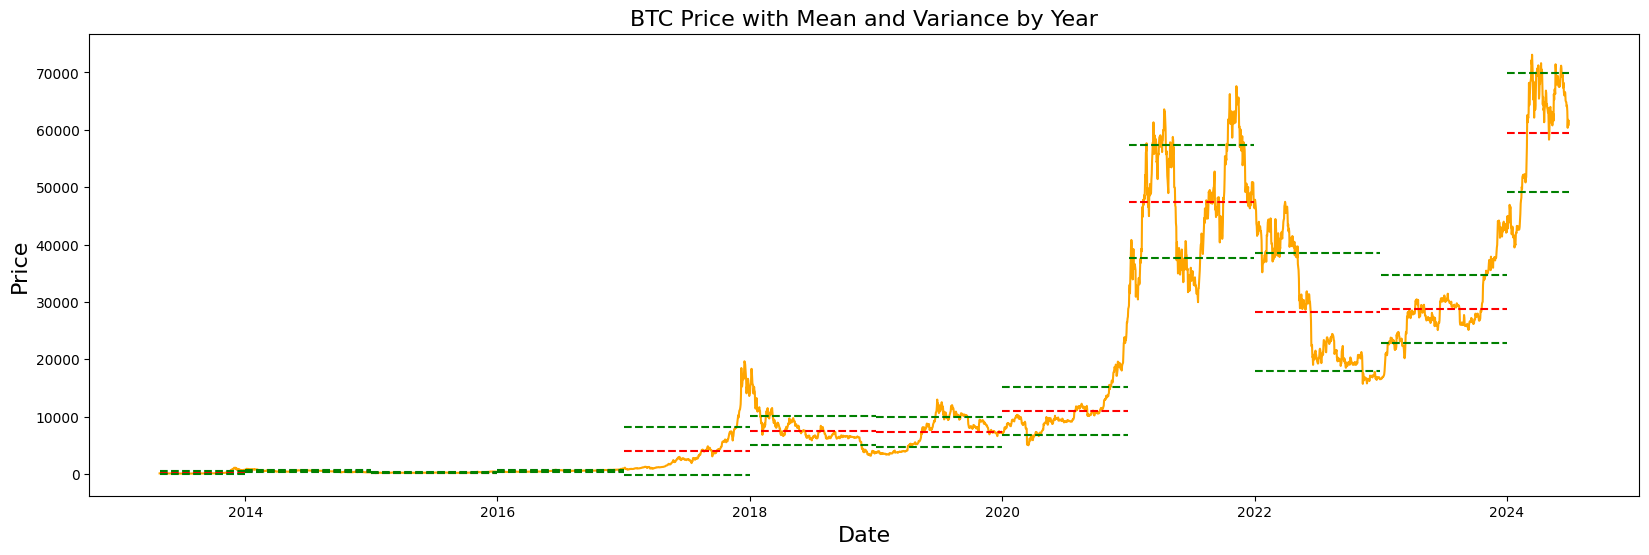

In [ ]:
# Visualize Bitcoin (BTC) price trends with mean and variance bands by year
draw_plot(data)

In [ ]:
def draw_plot(data):
    """
    Draw a plot showing Bitcoin (BTC) price over time with mean and variance bands for each year.

    Parameters:
    - data: DataFrame containing 'date' (datetime), 'price' (numeric), and optionally 'year' (numeric) columns.

    Returns:
    - None
    """
    # Ensure 'date' column is in datetime format
    data['date'] = pd.to_datetime(data['date'])

    # Create 'year' column to store the year of each date
    data['year'] = data['date'].dt.year

    # Calculate mean and variance of price for each year
    mean_by_year = data.groupby('year')['price'].mean()
    variance_by_year = data.groupby('year')['price'].var()

    # Plotting
    plt.figure(figsize=(20, 6))

    # Plot original data
    plt.plot(data['date'], data['price'], c='orange', label='True values')

    # Plot mean and variance bands for each year
    for year, mean in mean_by_year.items():
        plt.plot(data[data['year'] == year]['date'], [mean] * len(data[data['year'] == year]['date']),
                 color='r', linestyle='--', label=f'Mean - {year}')

        # Plot upper and lower variance bands
        plt.plot(data[data['year'] == year]['date'],
                 [mean + np.sqrt(variance_by_year[year])] * len(data[data['year'] == year]['date']),
                 color='g', linestyle='--', label=f'Mean + Variance - {year}')
        plt.plot(data[data['year'] == year]['date'],
                 [mean - np.sqrt(variance_by_year[year])] * len(data[data['year'] == year]['date']),
                 color='g', linestyle='--', label=f'Mean - Variance - {year}')

    # Configure plot
    plt.xlabel("Date", fontsize=16)
    plt.ylabel("Price", fontsize=16)
    plt.title("BTC Price with Mean and Variance by Year", fontsize=16)
    plt.legend()
    plt.show()

### Explanation:

### Function Purpose:
The `draw_plot` function generates a plot that displays Bitcoin (BTC) prices over time. Additionally, it highlights the mean and variance bands for each year, providing insights into the annual trends and volatility of BTC prices.

### Parameters:
- **data**: A DataFrame containing:
  - `'date'`: Column with date values (initially may not be in datetime format).
  - `'price'`: Column with Bitcoin prices.
  - `'year'`: Optional column with the year of each date. If not present, the function will create this column.

### Function Breakdown:

1. **Ensure 'date' Column is in Datetime Format:**
   ```python
   data['date'] = pd.to_datetime(data['date'])
   ```
   This line converts the 'date' column in the `data` DataFrame to datetime format. This ensures that dates are correctly interpreted and can be manipulated as datetime objects.

2. **Create 'year' Column:**
   ```python
   data['year'] = data['date'].dt.year
   ```
   This line extracts the year from each date in the 'date' column and stores it in a new column called 'year'. This step prepares the data for subsequent analysis by year.

3. **Calculate Mean and Variance of Prices by Year:**
   ```python
   mean_by_year = data.groupby('year')['price'].mean()
   variance_by_year = data.groupby('year')['price'].var()
   ```
   - `mean_by_year` calculates the mean BTC price for each year using the `groupby` method.
   - `variance_by_year` calculates the variance of BTC prices for each year, again using the `groupby` method.
   These calculations provide a summary of the average price and its variability for each year.

4. **Initialize Plot Figure:**
   ```python
   plt.figure(figsize=(20, 6))
   ```
   This line initializes a new plot with a specified figure size of 20 inches wide and 6 inches tall, setting up the canvas for plotting.

5. **Plot Original Bitcoin Prices:**
   ```python
   plt.plot(data['date'], data['price'], c='orange', label='True values')
   ```
   This line plots the original BTC prices over time. The prices are plotted against their corresponding dates in orange color, and the data series is labeled 'True values' for identification in the legend.

6. **Plot Mean and Variance Bands for Each Year:**
   ```python
   for year, mean in mean_by_year.items():
       plt.plot(data[data['year'] == year]['date'], [mean] * len(data[data['year'] == year]['date']),
                color='r', linestyle='--', label=f'Mean - {year}')
   
       plt.plot(data[data['year'] == year]['date'],
                [mean + np.sqrt(variance_by_year[year])] * len(data[data['year'] == year]['date']),
                color='g', linestyle='--', label=f'Mean + Variance - {year}')
   
       plt.plot(data[data['year'] == year]['date'],
                [mean - np.sqrt(variance_by_year[year])] * len(data[data['year'] == year]['date']),
                color='g', linestyle='--', label=f'Mean - Variance - {year}')
   ```
   - For each year in `mean_by_year`:
     - A red dashed line (`color='r', linestyle='--'`) is plotted representing the mean price for that year.
     - Two green dashed lines (`color='g', linestyle='--'`) are plotted, representing the mean price plus and minus the standard deviation (square root of variance) for that year. These lines show the range within which the prices typically vary around the mean.

7. **Configure Plot Details:**
   ```python
   plt.xlabel("Date", fontsize=16)
   plt.ylabel("Price", fontsize=16)
   plt.title("BTC Price with Mean and Variance by Year", fontsize=16)
   plt.legend()
   ```
   - `plt.xlabel("Date", fontsize=16)`: Sets the x-axis label to "Date" with a font size of 16.
   - `plt.ylabel("Price", fontsize=16)`: Sets the y-axis label to "Price" with a font size of 16.
   - `plt.title("BTC Price with Mean and Variance by Year", fontsize=16)`: Sets the title of the plot.
   - `plt.legend()`: Adds a legend to the plot to identify different lines (original prices, mean, and variance bands).

8. **Display the Plot:**
   ```python
   plt.show()
   ```
   This line displays the plot with all the configured elements.


#First-order differencing

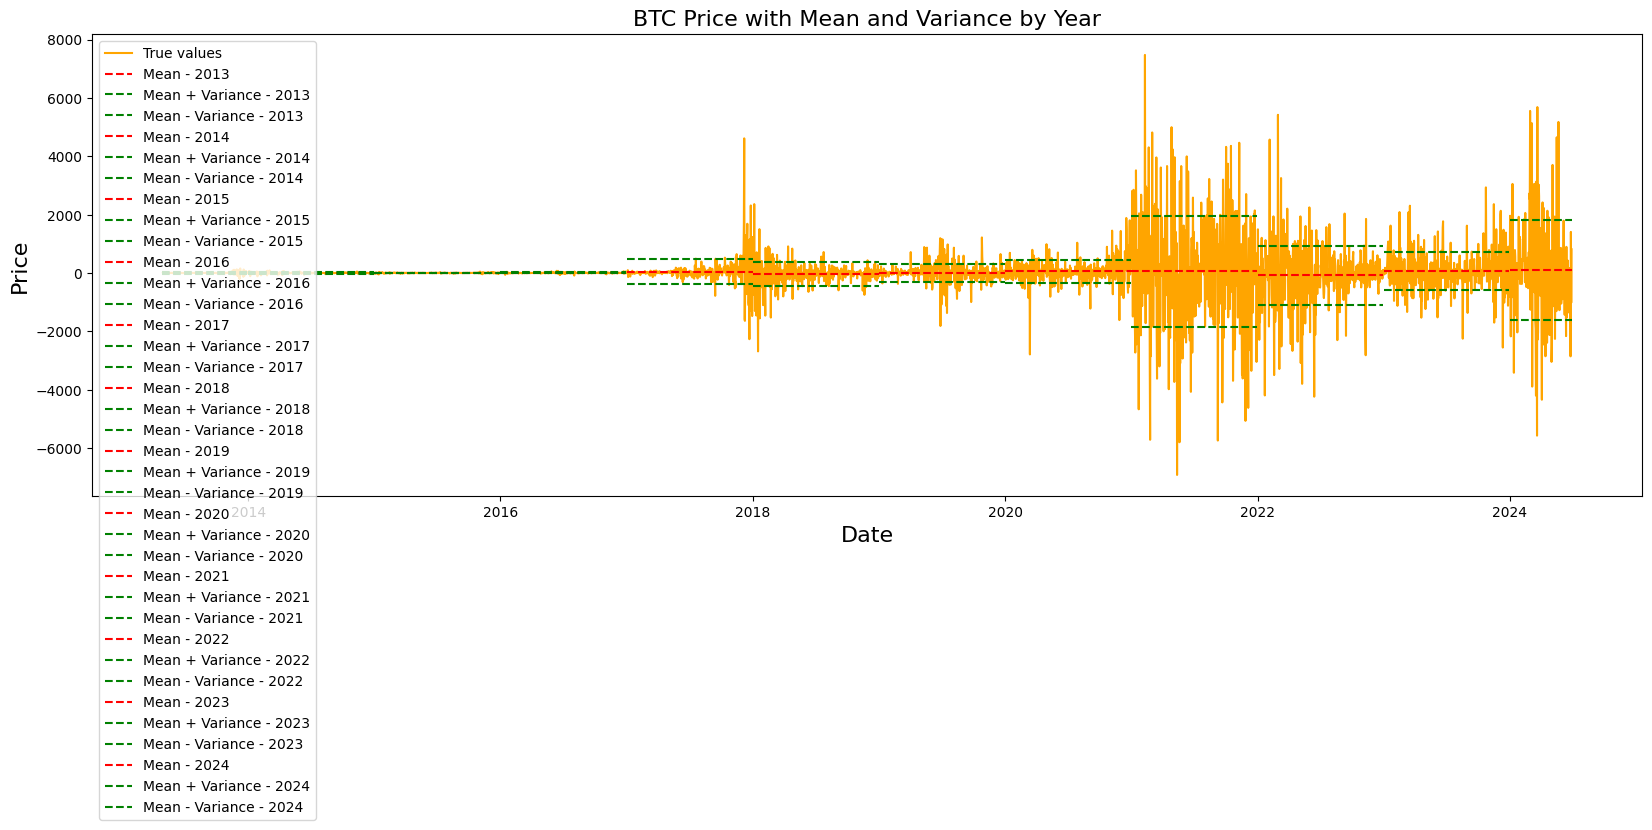

In [ ]:
df_diff = data.copy()  # Create a copy of the original data

# Apply first-order differencing to the 'price' column
df_diff['price'] = data['price'].diff()

# Draw plot of the differenced data
draw_plot(df_diff)

### Explanation:

1. **Copy the Original Data:**
   ```python
   df_diff = data.copy()
   ```
   - Creates a copy of the original `data` DataFrame to avoid modifying the original data.

2. **Apply First-Order Differencing:**
   ```python
   df_diff['price'] = data['price'].diff()
   ```
   - Transforms the 'price' column by calculating the difference between each price and the previous price. This operation removes trends and makes the data more stationary, which can be useful for certain types of analysis.

3. **Plot the Differenced Data:**
   ```python
   draw_plot(df_diff)
   ```
   - Calls the `draw_plot` function to visualize the differenced BTC prices over time, along with the mean and variance bands for each year of the differenced data.

#Second-order differencing

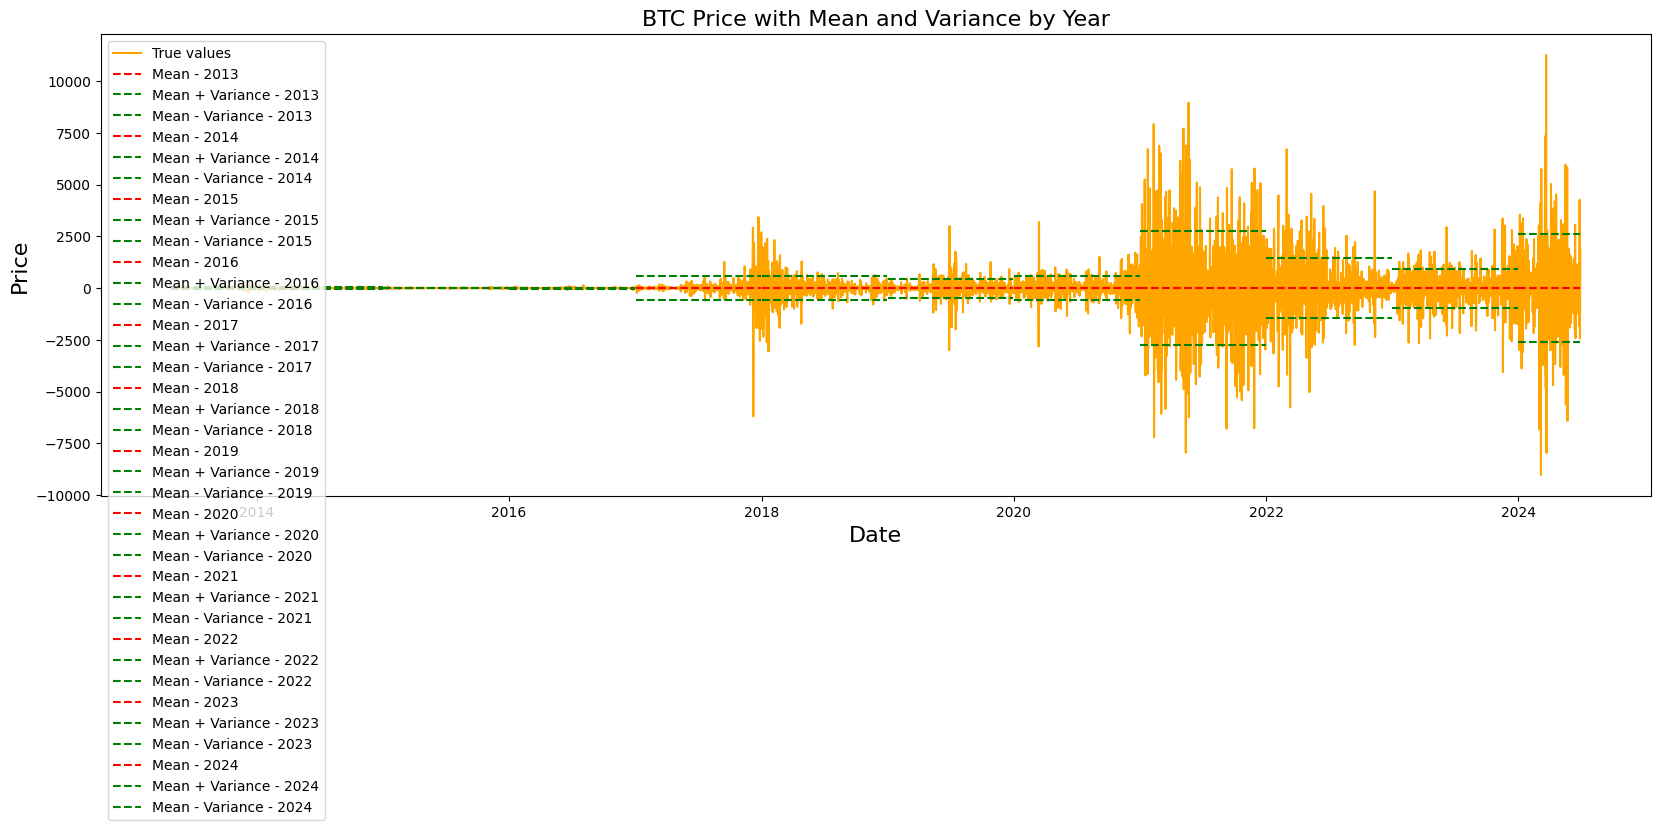

In [ ]:
# Create a copy of the original data
df_2diff = data.copy()

# Apply second-order differencing to the 'price' column
df_2diff['price'] = data['price'].diff().diff()

# Draw plot of the second-order differenced data
draw_plot(df_2diff)

### Explanation:

1. **Copy the Original Data:**
   ```python
   df_2diff = data.copy()
   ```
   - Creates a copy of the original `data` DataFrame to avoid modifying the original data.

2. **Apply Second-Order Differencing:**
   ```python
   df_2diff['price'] = data['price'].diff().diff()
   ```
   - Transforms the 'price' column by applying first-order differencing twice. This calculates the difference of the differences, which can remove both linear trends and seasonal effects, making the data more stationary.

3. **Plot the Differenced Data:**
   ```python
   draw_plot(df_2diff)
   ```
   - Calls the `draw_plot` function to visualize the second-order differenced BTC prices over time, along with the mean and variance bands for each year of the differenced data.
   

# Seasonal-order differencing

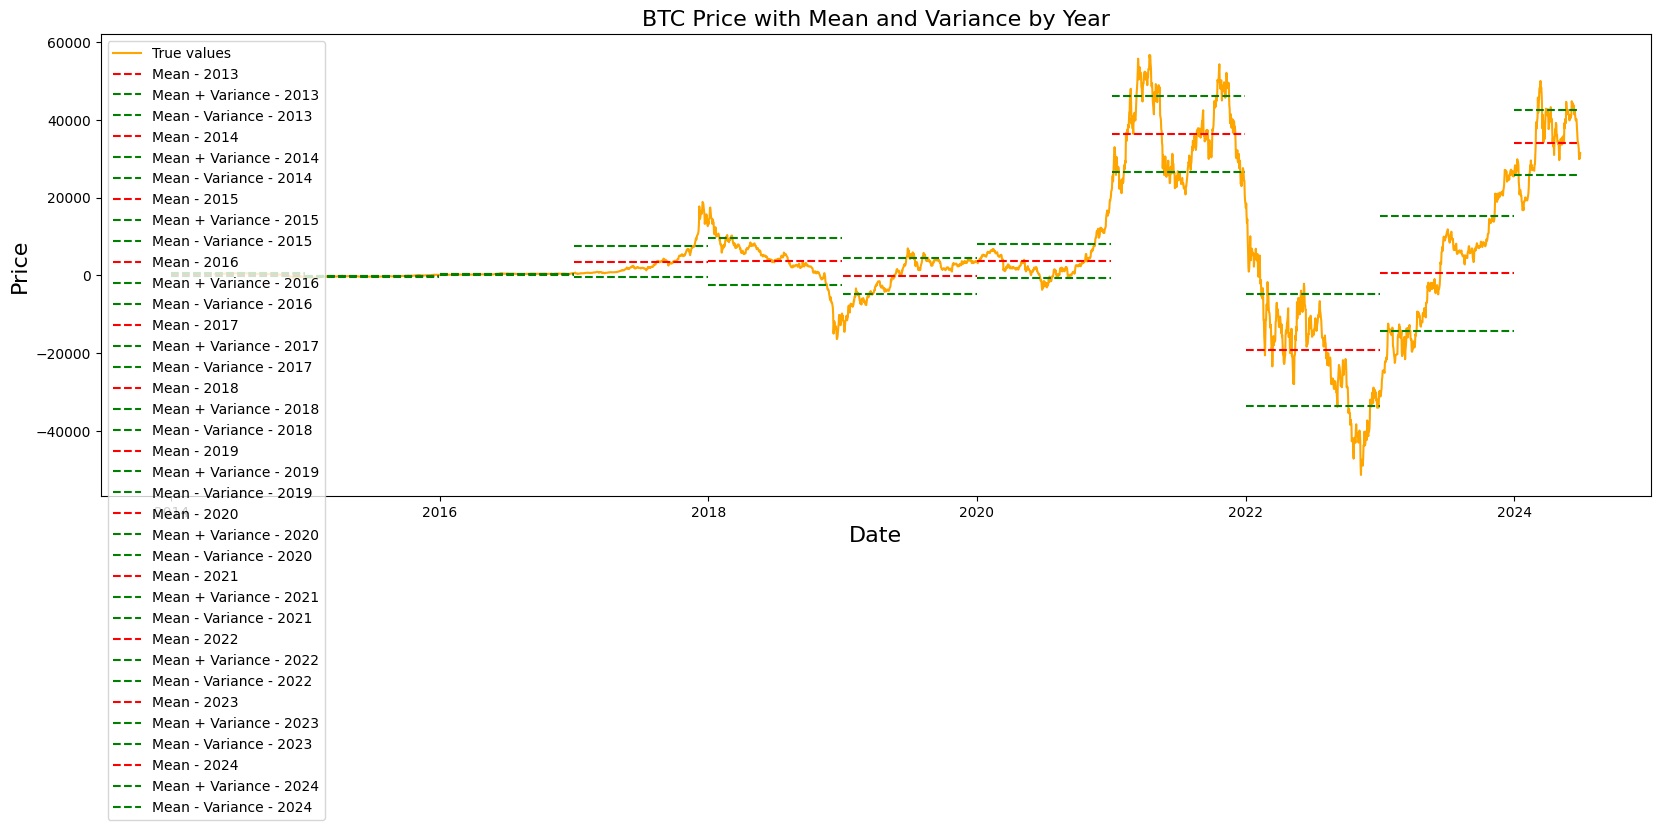

In [ ]:
# Seasonal-order differencing
df_ssdiff = data.copy()  # Create a copy of the original data

# Apply seasonal differencing with a period of 365 days (1 year)
df_ssdiff['price'] = data['price'].diff(periods=365)

# Draw plot of the seasonally differenced data
draw_plot(df_ssdiff)

# Log transformation

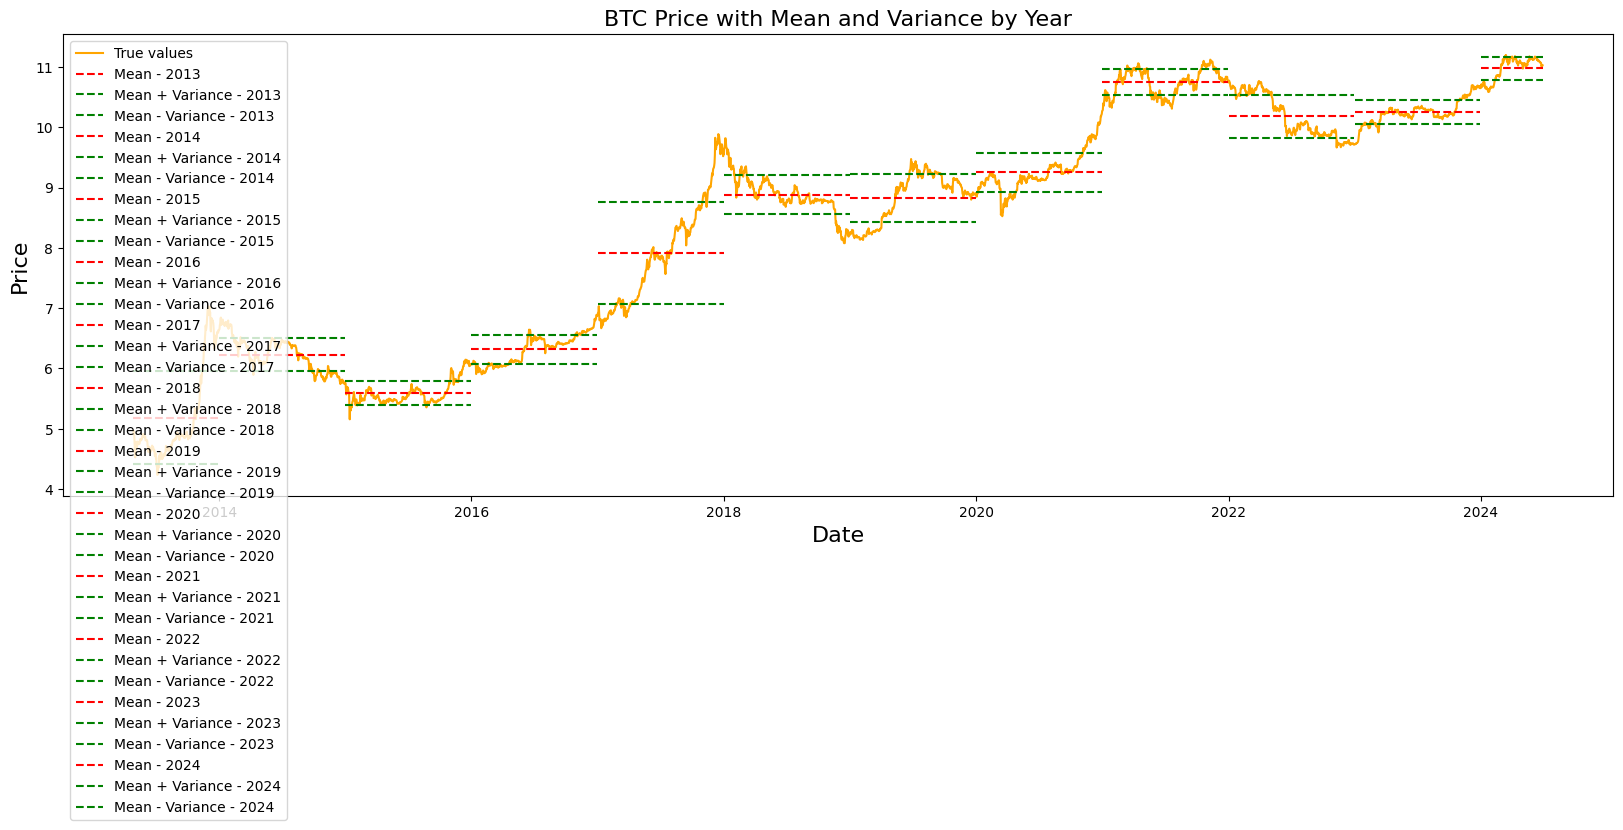

In [ ]:
# Create a copy of the original data
df_logt = data.copy()

# Apply log transformation to the 'price' column
df_logt['price'] = np.log1p(data['price'])

# Draw plot of the log-transformed data
draw_plot(df_logt)

# Log transformation + First-order differencing

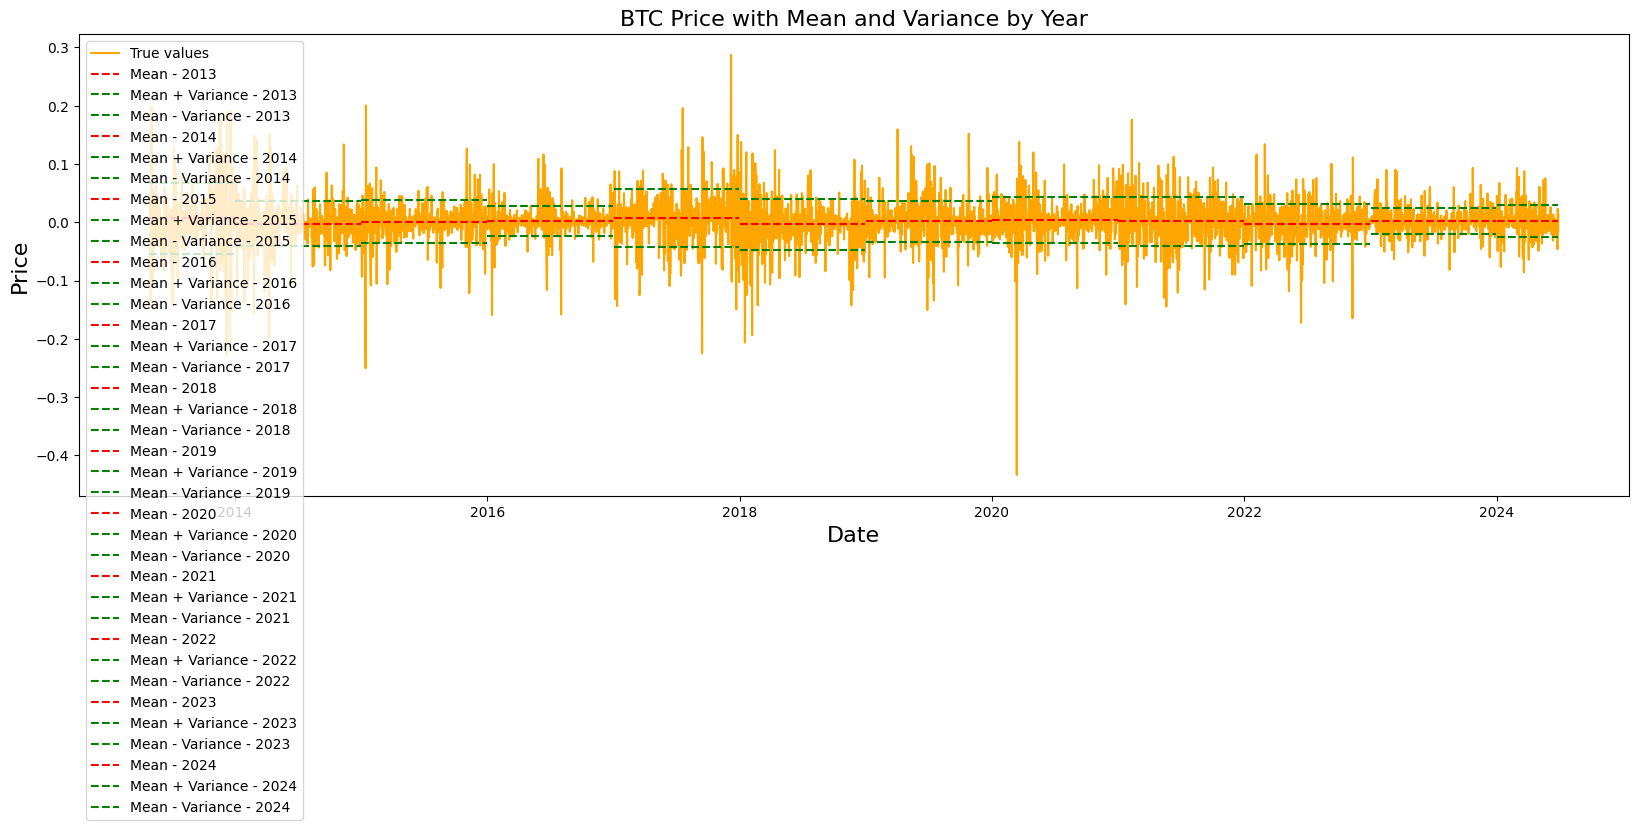

In [ ]:
# Create a copy of the log-transformed data
df_logt_diff = df_logt.copy()

# Apply first-order differencing to the log-transformed 'price' column
df_logt_diff['price'] = df_logt['price'].diff()

# Draw plot of the log-transformed and differenced data
draw_plot(df_logt_diff)

In [ ]:
# Rolling window by year
data_year_mean = data.copy()  # Create a copy of the original data

data_year_mean['price'] = data['price'].rolling(window=365).mean()  # Calculate the rolling mean with a window of 365 days (1 year)

In [ ]:
# Rolling window by month
data_month_mean = data.copy()  # Create a copy of the original data
data_month_mean['price'] = data['price'].rolling(window=30).mean()  # Calculate the rolling mean with a window of 30 days (1 month)

In [ ]:
# Expanding window
data_expand = data.copy()  # Create a copy of the original data
data_expand['price'] = data['price'].expanding().mean()  # Calculate the expanding mean of the 'price' column

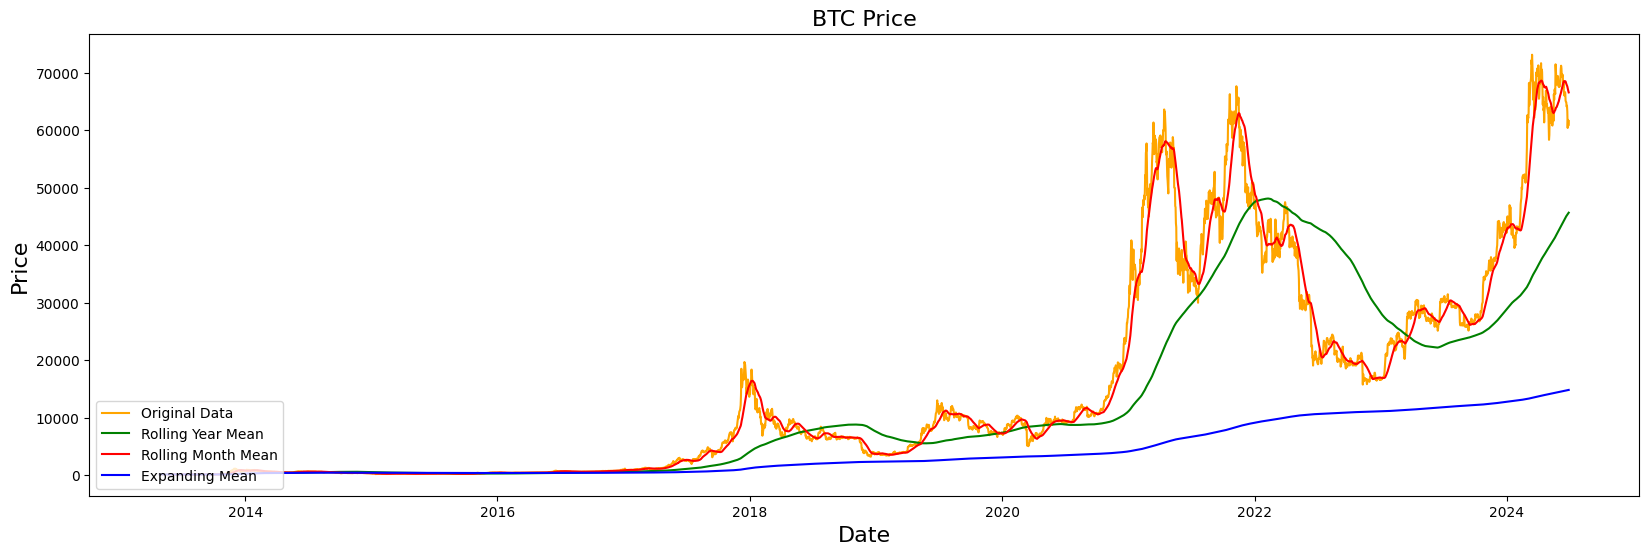

In [ ]:
plt.figure(figsize=(20, 6))

# Plot original data
plt.plot(data['date'], data['price'], c='orange', label='Original Data')

# Plot rolling year mean
plt.plot(data_year_mean['date'], data_year_mean['price'], c='green', label='Rolling Year Mean')

# Plot rolling month mean
plt.plot(data_month_mean['date'], data_month_mean['price'], c='red', label='Rolling Month Mean')

# Plot expanding mean
plt.plot(data_expand['date'], data_expand['price'], c='blue', label='Expanding Mean')

# Configure plot
plt.legend(loc="lower left")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.title("BTC Price", fontsize=16)
plt.show()

### Explanation:

- **Figure Size:**
  ```python
  plt.figure(figsize=(20, 6))
  ```
  - Sets the figure size for the plot to 20 inches in width and 6 inches in height.

- **Plotting:**
  ```python
  plt.plot(data['date'], data['price'], c='orange', label='Original Data')
  plt.plot(data_year_mean['date'], data_year_mean['price'], c='green', label='Rolling Year Mean')
  plt.plot(data_month_mean['date'], data_month_mean['price'], c='red', label='Rolling Month Mean')
  plt.plot(data_expand['date'], data_expand['price'], c='blue', label='Expanding Mean')
  ```
  - Plots the BTC price data and different means on the same plot using different colors ('orange' for original data, 'green' for rolling year mean, 'red' for rolling month mean, 'blue' for expanding mean).

- **Legend:**
  ```python
  plt.legend(loc="lower left")
  ```
  - Places the legend in the lower-left corner of the plot to indicate the meaning of each line.

- **Labels and Title:**
  ```python
  plt.xlabel("Date", fontsize=16)
  plt.ylabel("Price", fontsize=16)
  plt.title("BTC Price", fontsize=16)
  ```
  - Sets labels for the x-axis and y-axis, and a title for the plot.


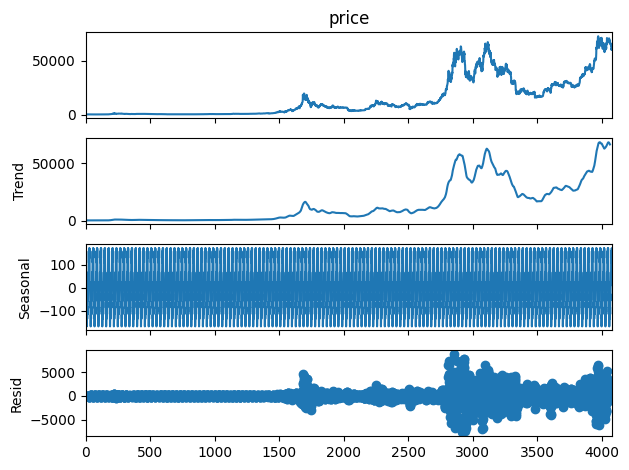

In [ ]:
# Series decomposition using seasonal_decompose from statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(data['price'], model='additive', period=30)

# Plot the decomposition
decomposition.plot()

# Show the plot
plt.show()

In [ ]:
# Assign the estimated trend and seasonal components from the seasonal decomposition to new columns in the 'data' DataFrame
data['trend'] = decomposition.trend
data['seasonal'] = decomposition.seasonal
data

,date,price,year,trend,seasonal
0,2013-04-28 00:00:00+00:00,135.300000,2013,NaN,3.681329
1,2013-04-29 00:00:00+00:00,141.960000,2013,NaN,24.038126
2,2013-04-30 00:00:00+00:00,135.300000,2013,NaN,24.035353
3,2013-05-01 00:00:00+00:00,117.000000,2013,NaN,9.176753
4,2013-05-02 00:00:00+00:00,103.430000,2013,NaN,-85.971183
...,...,...,...,...,...
4073,2024-06-24 00:00:00+00:00,63221.357384,2024,NaN,110.322029
4074,2024-06-25 00:00:00+00:00,60363.234975,2024,NaN,112.739365
4075,2024-06-26 00:00:00+00:00,61770.413870,2024,NaN,145.270241
4076,2024-06-27 00:00:00+00:00,60749.896194,2024,NaN,173.480907


In [ ]:
# Fill missing values in the 'trend' column using forward fill (ffill) and backward fill (bfill)
data['trend'] = data['trend'].ffill()  # Fill forward
data['trend'] = data['trend'].bfill()  # Fill backward
data['trend']  # Display the 'trend' column

0         119.83175
1         119.83175
2         119.83175
3         119.83175
4         119.83175
           ...     
4073    66658.59902
4074    66658.59902
4075    66658.59902
4076    66658.59902
4077    66658.59902
Name: trend, Length: 4078, dtype: float64

In [ ]:
# Splitting the data into training and test sets based on a specified date
split_date = '2022-04-20'

# Training data includes dates up to and including 'split_date'
train_data = data[data['date'] <= split_date]

# Test data includes dates after 'split_date'
test_data = data[data['date'] > split_date]

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize 'price' column in the entire dataset
scaler = StandardScaler()
data.loc[:, 'price'] = scaler.fit_transform(data[['price']])

# Standardize 'price' column in the training dataset
scaler_train = StandardScaler()
train_data.loc[:, 'price'] = scaler_train.fit_transform(train_data[['price']])

# Standardize 'price' column in the test dataset
scaler_test = StandardScaler()
test_data.loc[:, 'price'] = scaler_test.fit_transform(test_data[['price']])

### Explanation:
- **StandardScaler from sklearn**: This is used for standardizing features by removing the mean and scaling to unit variance.
  
- **Entire Dataset (`data`)**:
  - `scaler.fit_transform(data[['price']])`: Fits the `StandardScaler` instance `scaler` to the 'price' column of the entire dataset (`data`) and transforms it. The result is assigned back to `data['price']`, overwriting the original values with standardized values.

- **Training Dataset (`train_data`)**:
  - `scaler_train.fit_transform(train_data[['price']])`: Fits a separate `StandardScaler` instance `scaler_train` to the 'price' column of the training dataset (`train_data`) and transforms it. The standardized values are assigned back to `train_data['price']`.

- **Test Dataset (`test_data`)**:
  - `scaler_test.fit_transform(test_data[['price']])`: Fits another separate `StandardScaler` instance `scaler_test` to the 'price' column of the test dataset (`test_data`) and transforms it. The standardized values are assigned back to `test_data['price']`.

### Purpose:
- **Normalization**: Standardizing the 'price' column ensures that each dataset (entire, training, and test) has a mean of 0 and a standard deviation of 1. This is useful for machine learning algorithms that perform better when features are on a similar scale.

- **Separate Scaling**: It's important to fit the scaler separately on the training data to prevent information leakage from the test set. Each scaler (`scaler_train` for training data and `scaler_test` for test data) learns the mean and variance only from its respective dataset.

### Usage:
- Ensure that you apply the same transformation (`transform` method) to any new data or predictions to maintain consistency with the scaling applied during training and testing.

This approach ensures that the data used for training and testing your machine learning models are processed in a standardized manner, facilitating better model performance and evaluation.

In [ ]:
# Print table header
print("       |        scale        |       mean        |      variance      ")
print("---------------------------------------------------------------------------")

# Print values for the entire dataset scaler
print(f'scaler |  {scaler.scale_[0]}  | {scaler.mean_[0]} | {scaler.var_[0]}')

# Print values for the training dataset scaler
print(f'train  |  {scaler_train.scale_[0]} | {scaler_train.mean_[0]} | {scaler_train.var_[0]}')

# Print values for the test dataset scaler
print(f'test   |  {scaler_test.scale_[0]} | {scaler_test.mean_[0]} | {scaler_test.var_[0]}')

       |        scale        |       mean        |      variance      
---------------------------------------------------------------------------
scaler |  18355.40166991395  | 14811.811183621057 | 336920770.4638799
train  |  15783.294719703143 | 10197.331837074169 | 249112392.2090091
test   |  15873.241989737415 | 33719.640306096946 | 251959811.26476303


# Scaling on the entire dataset is chosen due to the higher mean in the test data compared to the training data.

In [ ]:
# Splitting the scaled data into training and test sets based on a specified date
split_date = '2022-04-20'

# Training data includes dates up to and including 'split_date'
train_data = data[data['date'] <= split_date]

# Test data includes dates after 'split_date'
test_data = data[data['date'] > split_date]

# RNN, LSTM, GRU

In [ ]:
# Assigning training and test data for modeling
X_train = train_data['date']  # Features for training: date
y_train = train_data['price']  # Target variable for training: price

X_test = test_data['date']  # Features for testing: date
y_test = test_data['price']  # Target variable for testing: price

### Explanation:
- **Features (`X_train`, `X_test`)**:
  - `X_train = train_data['date']`: This assigns the 'date' column from `train_data` to `X_train`, which typically represents the independent variables or features used for training the model.
  - `X_test = test_data['date']`: Similarly, assigns the 'date' column from `test_data` to `X_test`, representing the features for testing the model.

- **Target Variables (`y_train`, `y_test`)**:
  - `y_train = train_data['price']`: This assigns the 'price' column from `train_data` to `y_train`, which typically represents the dependent variable or target variable used for training the model.
  - `y_test = test_data['price']`: Similarly, assigns the 'price' column from `test_data` to `y_test`, representing the target variable for testing the model.

### Purpose:
- **Modeling Preparation**: This step separates your data into features (`X_train`, `X_test`) and target variables (`y_train`, `y_test`) required for training and evaluating your machine learning models.

### Usage:
- Ensure that after splitting your data into training and test sets (`train_data` and `test_data`), you correctly assign the appropriate columns (`date` as features and `price` as target) to `X_train`, `y_train`, `X_test`, and `y_test` for further modeling steps.


In [ ]:
n_features = 1  # Number of features (in this case, 1, because we are reshaping for time series)

# Reshape training series to fit the model's expected input shape
train_series = y_train.values.reshape((len(y_train), n_features))

# Reshape test series to fit the model's expected input shape
test_series = y_test.values.reshape((len(y_test), n_features))

### Explanation:
- **Number of Features (`n_features`)**:
  - `n_features = 1`: Indicates that each data point in `train_series` and `test_series` represents a single feature. This is common when reshaping data for time series or single-feature models.

- **Reshaping (`reshape()` Method)**:
  - `y_train.values.reshape((len(y_train), n_features))`: Reshapes the `y_train` array into a 2D array where each row corresponds to a sample (or time step) and each column corresponds to a feature.
  - `y_test.values.reshape((len(y_test), n_features))`: Similarly reshapes the `y_test` array into a compatible format.


# TensorFlow libraries


- **TensorFlow and Keras**:
  - `Sequential`: Allows for linear stacking of layers to build a neural network model.
  - `LSTM`, `GRU`, `SimpleRNN`: Different types of recurrent neural network (RNN) layers commonly used for time series modeling.
  - `Dropout`, `Dense`: Regularization techniques and fully connected (dense) layers used in neural networks.
  - `TimeseriesGenerator`: Helps in preparing time series data into samples for model training, handling sequences and batch sizes.
  
- **Scikit-Learn Metrics**:
  - `mean_squared_error`: Computes the mean squared error between predicted and true values, a common metric for regression tasks.
  - `mean_absolute_percentage_error`: Computes the mean absolute percentage error, useful for understanding the magnitude of errors in percentage terms.

In [ ]:
# Importing necessary libraries for time series modeling and evaluation
from tensorflow.keras import Sequential  # For building sequential models
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Dropout, Dense  # Various types of neural network layers
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator  # Generates batches of temporal data for model training
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error  # Evaluation metrics for model performance

## LSTM 2 layer

In [ ]:
sequence_length = 1  # Length of the input sequences

# Create TimeseriesGenerator for train and test data
train_generator = TimeseriesGenerator(train_series, train_series,
                                      length=sequence_length,
                                      sampling_rate=1,
                                      stride=1,
                                      batch_size=32)

test_generator = TimeseriesGenerator(test_series, test_series,
                                     length=sequence_length,
                                     sampling_rate=1,
                                     stride=1,
                                     batch_size=32)

# Define the LSTM model
model = Sequential([
    LSTM(100, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(100, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model using the train_generator
model.fit(train_generator, epochs=300, verbose=0)

# Make predictions using the test_generator
y_pred = model.predict(test_generator)

# Flatten the predictions
y_pred = y_pred.flatten()

25/25 [==============================] - 0s 3ms/step


### Explanation:
- **TimeseriesGenerator**:
  - `train_generator` and `test_generator`: Instances of TimeseriesGenerator that generate batches of temporal data. Each batch consists of `sequence_length` time steps of `train_series` and `test_series`.

- **LSTM Model**:
  - `Sequential`: Keras function to create a linear stack of layers.
  - `LSTM(100, activation='relu', return_sequences=True, input_shape=(sequence_length, 1))`: LSTM layer with 100 units, ReLU activation, and returns sequences (necessary when stacking LSTM layers).
  - `LSTM(100, activation='relu')`: Second LSTM layer with 100 units and ReLU activation (final LSTM layer in this case).
  - `Dropout(0.2)`: Dropout layer to reduce overfitting by randomly setting 20% of input units to 0 at each update during training.
  - `Dense(1)`: Fully connected (dense) layer with 1 unit for the output.

- **Model Compilation and Training**:
  - `model.compile(optimizer='adam', loss='mse')`: Compiles the model with Adam optimizer and Mean Squared Error (MSE) loss function for regression tasks.
  - `model.fit(train_generator, epochs=300, verbose=0)`: Trains the model using `train_generator` for 300 epochs (iterations over the entire dataset), with verbose mode off.

- **Prediction and Post-processing**:
  - `model.predict(test_generator)`: Generates predictions using `test_generator`.
  - `y_pred.flatten()`: Flattens the predictions to convert them into a 1D array.

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test[sequence_length:], y_pred)  # Calculate Mean Squared Error
mape = mean_absolute_percentage_error(y_test[sequence_length:], y_pred)  # Calculate Mean Absolute Percentage Error

# Print evaluation metrics
print('Mean Squared Error:', mse)
print('Mean Absolute Percentage Error:', mape * 100)

Mean Squared Error: 0.003799954294278882
Mean Absolute Percentage Error: 6.337945095568162


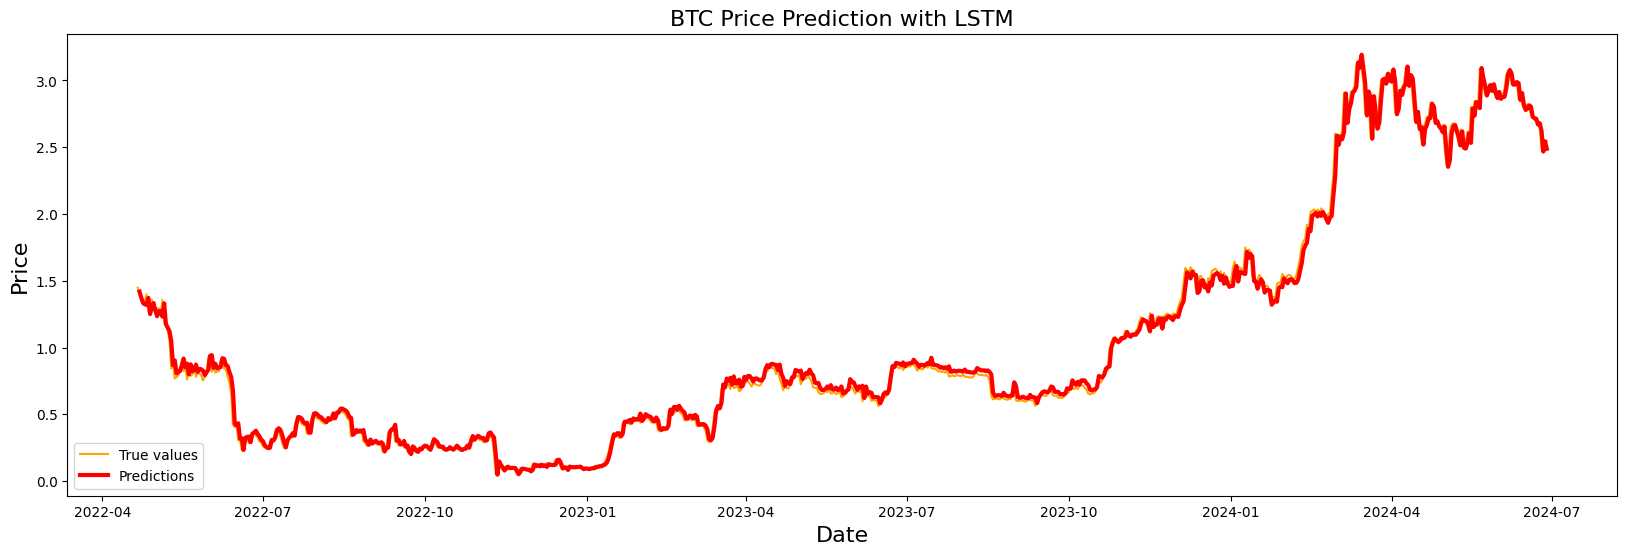

In [ ]:
plt.figure(figsize=(20, 6))

# Plotting true values
plt.plot(test_data['date'], test_data['price'], c='orange', label='True values')

# Plotting predictions
plt.plot(X_test[sequence_length:], y_pred, lw=3, c='r', linestyle='-', label='Predictions')

# Configure plot
plt.legend(loc="lower left")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.title("BTC Price Prediction with LSTM", fontsize=16)
plt.show()

### Explanation:
- **True Values**:
  - `plt.plot(test_data['date'], test_data['price'], c='orange', label='True values')`: Plots the actual BTC prices (`test_data['price']`) against dates (`test_data['date']`) in orange.

- **Predictions**:
  - `plt.plot(X_test[sequence_length:], y_pred, lw=3, c='r', linestyle='-', label='Predictions')`: Plots the predicted BTC prices (`y_pred`) against dates (`X_test[sequence_length:]`) in red with a solid line.

- **Plot Configuration**:
  - `plt.legend(loc="lower left")`: Displays the legend in the lower-left corner to distinguish between true values and predictions.
  - `plt.xlabel("Date", fontsize=16)`: Sets the label for the x-axis.
  - `plt.ylabel("Price", fontsize=16)`: Sets the label for the y-axis.
  - `plt.title("BTC Price Prediction with LSTM", fontsize=16)`: Sets the title of the plot.


## RNN

In [ ]:
sequence_length = 1

# Create TimeseriesGenerator for train and test data
train_generator = TimeseriesGenerator(train_series, train_series,
                                      length=sequence_length,
                                      sampling_rate=1,
                                      stride=1,
                                      batch_size=256)

test_generator = TimeseriesGenerator(test_series, test_series,
                                     length=sequence_length,
                                     sampling_rate=1,
                                     stride=1,
                                     batch_size=256)

# Define the SimpleRNN model
model = Sequential([
    SimpleRNN(128, activation='relu'),  # SimpleRNN layer with 128 units and ReLU activation
    Dropout(0.2),                       # Dropout layer with dropout rate of 20% to prevent overfitting
    Dense(1)                            # Output layer with 1 unit (for predicting one value)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Adam optimizer and Mean Squared Error loss function

# Train the model using the train_generator
model.fit(train_generator, epochs=300, verbose=0)  # Train for 300 epochs with verbose set to 0 (silent mode)

# Make predictions using the test_generator
y_pred = model.predict(test_generator)  # Predict using the test generator

# Flatten the predictions
y_pred = y_pred.flatten()  # Flatten the predictions to simplify evaluation

# Evaluate the model
mse = mean_squared_error(y_test[sequence_length:], y_pred)  # Calculate Mean Squared Error
mape = mean_absolute_percentage_error(y_test[sequence_length:], y_pred)  # Calculate Mean Absolute Percentage Error

# Print evaluation metrics
print('Mean Squared Error:', mse)
print('Mean Absolute Percentage Error:', mape * 100)

4/4 [==============================] - 0s 6ms/step
Mean Squared Error: 0.003295976290655126
Mean Absolute Percentage Error: 5.988623404659984


### Explanation:
- **TimeseriesGenerator**:
  - Generates batches of temporal data for training and testing.
  - `train_generator` and `test_generator` are created with `batch_size=256`, generating sequences of length `sequence_length=1` from `train_series` and `test_series`.

- **SimpleRNN Model**:
  - Uses a SimpleRNN layer with 128 units and ReLU activation function for learning temporal patterns.
  - Includes a Dropout layer with a dropout rate of 20% to mitigate overfitting.
  - The output layer (`Dense(1)`) predicts a single value.

- **Model Compilation**:
  - Configures the model for training with the Adam optimizer and Mean Squared Error loss function (`mse`).

- **Training**:
  - Trains the model on `train_generator` for 300 epochs (`epochs=300`) with verbose output turned off (`verbose=0`).

- **Prediction**:
  - Predicts values using `test_generator` and flattens the predictions (`y_pred`) for evaluation.

- **Evaluation**:
  - Calculates Mean Squared Error (`mse`) and Mean Absolute Percentage Error (`mape`) between actual (`y_test[sequence_length:]`) and predicted (`y_pred`) values.

### Purpose:
- **Model Training and Evaluation**:
  - Trains a SimpleRNN model to forecast future BTC prices based on historical data.
  - Evaluates the model's performance using MSE and MAPE to assess prediction accuracy.

### Usage:
- Adjust hyperparameters like the number of units in the SimpleRNN layer (`128`), dropout rate (`0.2`), and training epochs (`300`) based on model performance and computational resources.
- Use the printed evaluation metrics (`mse` and `mape`) to gauge how well the model predicts BTC prices. Lower values indicate better prediction accuracy. Adjust the model architecture or preprocessing steps if needed to improve performance.

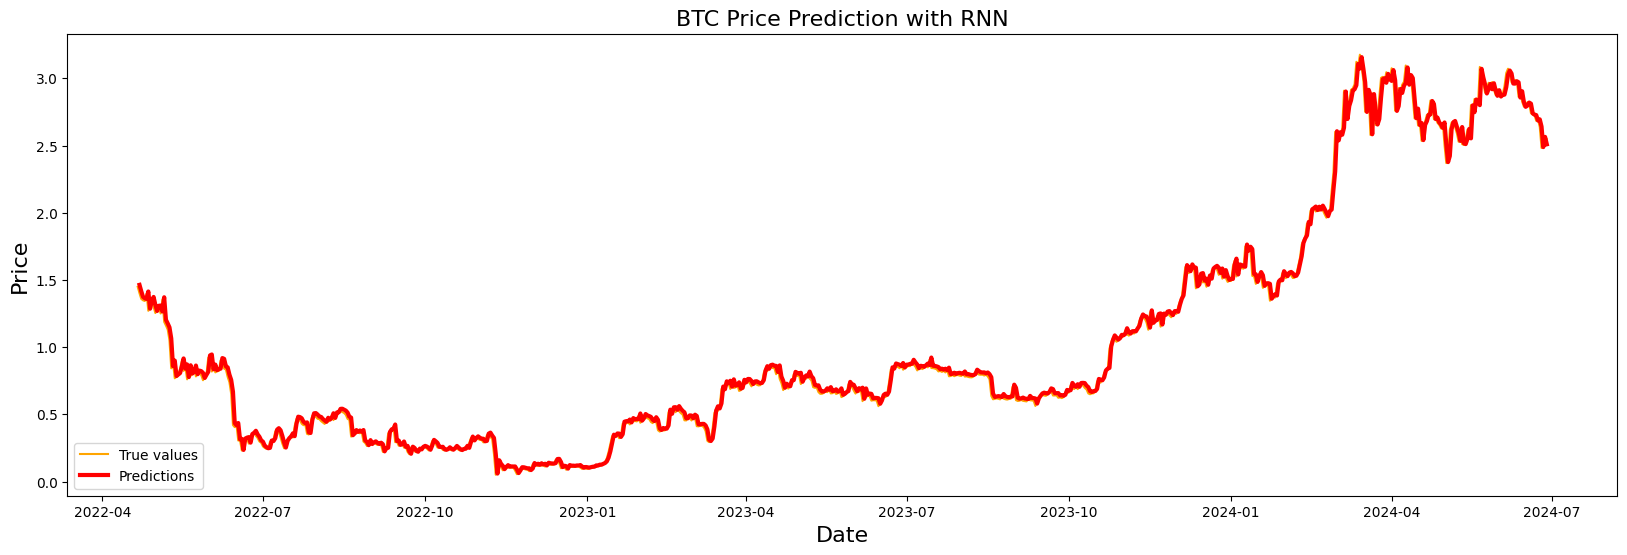

In [ ]:
plt.figure(figsize=(20, 6))  # Set the figure size

# Plot true values from the test data
plt.plot(test_data['date'], test_data['price'], c='orange', label='True values')

# Plot predicted values from the model
plt.plot(X_test[sequence_length:], y_pred, lw=3, c='r', linestyle='-', label='Predictions')

plt.legend(loc="lower left")  # Show legend at lower left corner
plt.xlabel("Date", fontsize=16)  # Label for x-axis
plt.ylabel("Price", fontsize=16)  # Label for y-axis
plt.title("BTC Price Prediction with RNN", fontsize=16)  # Title of the plot

plt.show()  # Display the plot

### Explanation:
- **Figure Size**:
  - `plt.figure(figsize=(20, 6))` sets the size of the plot to 20 inches in width and 6 inches in height.

- **True Values**:
  - `plt.plot(test_data['date'], test_data['price'], c='orange', label='True values')` plots the actual BTC prices (`test_data['price']`) over time (`test_data['date']`) in orange color with the label "True values".

- **Predictions**:
  - `plt.plot(X_test[sequence_length:], y_pred, lw=3, c='r', linestyle='-', label='Predictions')` plots the predicted BTC prices (`y_pred`) over time (`X_test[sequence_length:]`) in red color with a solid line (`linestyle='-'`) and thicker line width (`lw=3`), labeled as "Predictions".

- **Legend**:
  - `plt.legend(loc="lower left")` places the legend at the lower left corner of the plot, displaying labels for "True values" and "Predictions".

- **Axes Labels and Title**:
  - `plt.xlabel("Date", fontsize=16)` and `plt.ylabel("Price", fontsize=16)` set labels for the x-axis and y-axis respectively, with font size 16.
  - `plt.title("BTC Price Prediction with RNN", fontsize=16)` sets the title of the plot to "BTC Price Prediction with RNN" with font size 16.

- **Display**:
  - `plt.show()` displays the plot.


## LSTM

In [ ]:
# Define the sequence length for the TimeseriesGenerator
sequence_length = 1

# Create TimeseriesGenerator for train and test data
train_generator = TimeseriesGenerator(train_series, train_series,
                                      length=sequence_length,
                                      sampling_rate=1,
                                      stride=1,
                                      batch_size=256)

test_generator = TimeseriesGenerator(test_series, test_series,
                                     length=sequence_length,
                                     sampling_rate=1,
                                     stride=1,
                                     batch_size=256)

# Define the LSTM model architecture
model = Sequential([
    LSTM(128, activation='relu'),  # LSTM layer with 128 units and ReLU activation
    Dropout(0.2),                  # Dropout layer to prevent overfitting (20% dropout rate)
    Dense(1)                       # Output layer with 1 neuron for regression
])

# Compile the model with Adam optimizer and Mean Squared Error loss function
model.compile(optimizer='adam', loss='mse')

# Train the model using the train_generator for 300 epochs
model.fit(train_generator, epochs=300, verbose=0)

# Make predictions using the test_generator
y_pred = model.predict(test_generator)

# Flatten the predictions to a 1D array
y_pred = y_pred.flatten()

# Evaluate the model performance using Mean Squared Error (MSE) and Mean Absolute Percentage Error (MAPE)
mse = mean_squared_error(y_test[sequence_length:], y_pred)
mape = mean_absolute_percentage_error(y_test[sequence_length:], y_pred)

# Print evaluation metrics
print('Mean Squared Error:', mse)
print('Mean Absolute Percentage Error:', mape * 100)

4/4 [==============================] - 0s 5ms/step
Mean Squared Error: 0.00655249745892198
Mean Absolute Percentage Error: 11.53377685233478


### Explanation:

1. **TimeseriesGenerator Setup:**
   - **TimeseriesGenerator**: This class from `tensorflow.keras.preprocessing.sequence` generates batches of temporal data for training or validation.
   - `train_generator` and `test_generator` are set up to generate batches of sequences (`length=sequence_length`) from `train_series` and `test_series`, respectively, with a batch size of 256.

2. **LSTM Model Definition:**

   - **Sequential Model**: This is a linear stack of layers in Keras.
   - **LSTM Layer**: A Long Short-Term Memory layer with 128 units and ReLU activation function.
   - **Dropout Layer**: Regularization layer to prevent overfitting, dropping 20% of input units randomly during training.
   - **Dense Layer**: Fully connected layer with 1 unit (for regression), to output the predicted BTC price.

3. **Model Compilation and Training:**

   - **Compile**: Configures the model for training with Adam optimizer and Mean Squared Error (MSE) loss function.
   - **Fit**: Trains the model using `train_generator` for 300 epochs (`epochs=300`) without verbose output (`verbose=0`).

4. **Prediction and Evaluation:**

   - **Prediction**: Generates predictions (`y_pred`) for `test_generator` data.
   - **Flatten**: Reshapes predictions to a 1D array for evaluation.
   - **Evaluation Metrics**: Computes Mean Squared Error (MSE) and Mean Absolute Percentage Error (MAPE) between actual (`y_test[sequence_length:]`) and predicted (`y_pred`) values.

5. **Print Evaluation Metrics:**

   - **Output**: Prints the calculated MSE and MAPE to evaluate the model's performance.

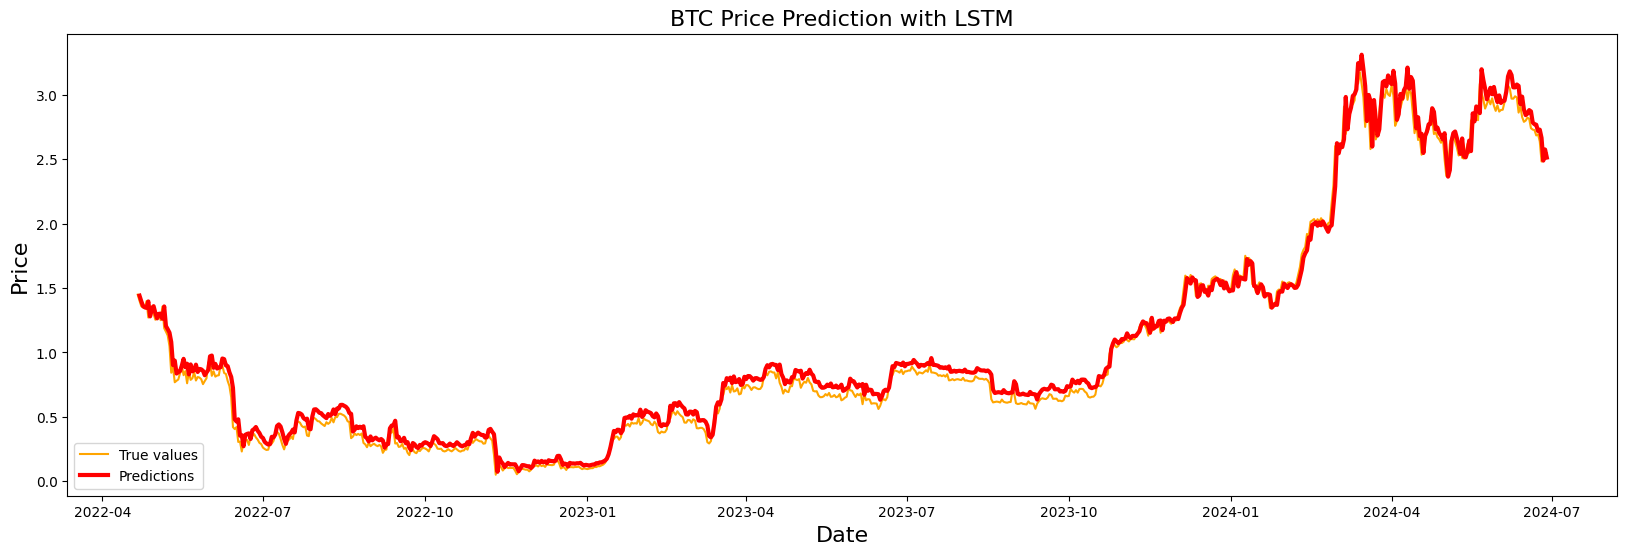

In [ ]:
# Plotting true values and predictions
plt.figure(figsize=(20, 6))  # Set the figure size

# Plot true values (test_data) in orange
plt.plot(test_data['date'], test_data['price'], c='orange', label='True values')

# Plot predicted values (y_pred) starting from sequence_length
plt.plot(X_test[sequence_length:], y_pred, lw=3, c='r', linestyle='-', label='Predictions')

# Add legend to the plot
plt.legend(loc="lower left")

# Set labels for x and y axes
plt.xlabel("Date", fontsize=16)
plt.ylabel("Price", fontsize=16)

# Set title for the plot
plt.title("BTC Price Prediction with LSTM", fontsize=16)

# Display the plot
plt.show()

## GRU

In [ ]:
# Set the sequence length for the timeseries data
sequence_length = 1

# Create TimeseriesGenerator for train and test data
train_generator = TimeseriesGenerator(train_series, train_series,
                                      length=sequence_length,
                                      sampling_rate=1,
                                      stride=1,
                                      batch_size=256)

test_generator = TimeseriesGenerator(test_series, test_series,
                                     length=sequence_length,
                                     sampling_rate=1,
                                     stride=1,
                                     batch_size=256)

# Define the GRU model using Keras Sequential API
model = Sequential([
    GRU(128, activation='relu'),  # GRU layer with 128 units and ReLU activation
    Dropout(0.2),                 # Dropout layer to prevent overfitting
    Dense(1)                      # Dense output layer with 1 neuron (for regression)
])

# Compile the model with Adam optimizer and Mean Squared Error loss
model.compile(optimizer='adam', loss='mse')

# Train the model using the train_generator for 300 epochs
model.fit(train_generator, epochs=300, verbose=0)

# Make predictions using the test_generator
y_pred = model.predict(test_generator)

# Flatten the predictions to align with y_test shape
y_pred = y_pred.flatten()

# Evaluate the model performance using Mean Squared Error (MSE) and Mean Absolute Percentage Error (MAPE)
mse = mean_squared_error(y_test[sequence_length:], y_pred)
mape = mean_absolute_percentage_error(y_test[sequence_length:], y_pred)

# Print evaluation metrics
print('Mean Squared Error:', mse)
print('Mean Absolute Percentage Error:', mape * 100)

4/4 [==============================] - 0s 5ms/step
Mean Squared Error: 0.00425053980078584
Mean Absolute Percentage Error: 9.404509207564637


### Explanation:
1. **Sequence Length**: Defines the length of the input sequences for the LSTM model.
  
2. **TimeseriesGenerator**: Creates generators for training (`train_generator`) and testing (`test_generator`) data. These generators yield batches of timeseries data and their corresponding targets.

3. **GRU Model Definition**:
   - **GRU Layer**: Defines a Gated Recurrent Unit (GRU) layer with 128 units and ReLU activation. GRU is a type of recurrent neural network (RNN) architecture suitable for sequential data.
   - **Dropout Layer**: Adds a Dropout layer with a rate of 0.2 to prevent overfitting by randomly setting a fraction of input units to zero during training.
   - **Dense Layer**: Defines a Dense layer with 1 neuron, which outputs the predicted value (regression task).

4. **Model Compilation**: Compiles the model using the Adam optimizer and Mean Squared Error (MSE) loss function, which is appropriate for regression tasks.

5. **Model Training**: Trains the model using `train_generator` for 300 epochs (`epochs=300`). The `verbose=0` parameter suppresses output during training.

6. **Prediction and Evaluation**:
   - **Prediction**: Uses the trained model to make predictions on the test data (`test_generator`).
   - **Flattening**: Flattens the predictions (`y_pred`) to align with the shape of `y_test`.
   - **Evaluation Metrics**: Calculates Mean Squared Error (MSE) and Mean Absolute Percentage Error (MAPE) between `y_test` and `y_pred` to evaluate the model's performance.

7. **Print Statements**: Displays the computed evaluation metrics (`MSE` and `MAPE`) to assess how well the GRU model predicts BTC prices based on the test data.

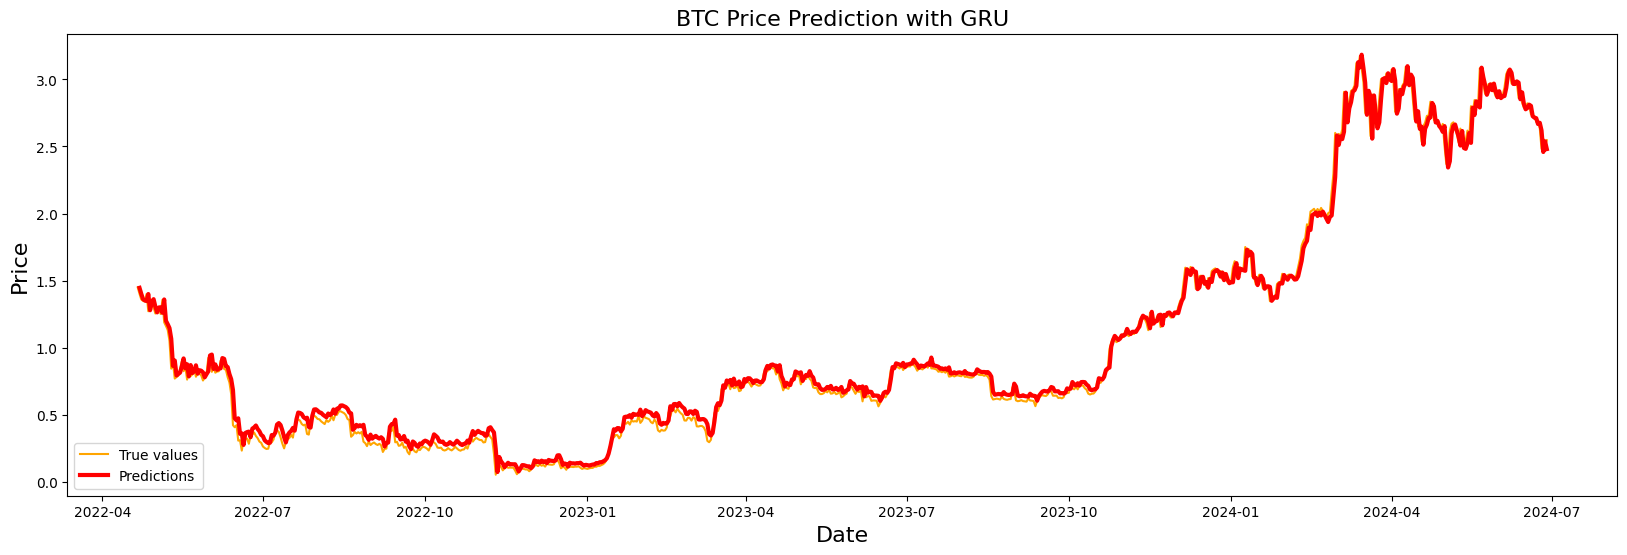

In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(20, 6))

# Plot the true values (actual BTC prices) from the test dataset
plt.plot(test_data['date'], test_data['price'], c='orange', label='True values')

# Plot the predicted values (BTC price predictions) from the GRU model
plt.plot(X_test[sequence_length:], y_pred, lw=3, c='r', linestyle='-', label='Predictions')

# Add a legend to differentiate between true values and predictions, placed at the lower left
plt.legend(loc="lower left")

# Label the x-axis and y-axis
plt.xlabel("Date", fontsize=16)
plt.ylabel("Price", fontsize=16)

# Set the title of the plot
plt.title("BTC Price Prediction with GRU", fontsize=16)

# Display the plot
plt.show()

### Explanation:
- **`plt.figure(figsize=(20, 6))`**: Sets the figure size for the plot.
- **`plt.plot(test_data['date'], test_data['price'], c='orange', label='True values')`**: Plots the true BTC prices (`test_data['price']`) over time (`test_data['date']`) in orange.
- **`plt.plot(X_test[sequence_length:], y_pred, lw=3, c='r', linestyle='-', label='Predictions')`**: Plots the predicted BTC prices (`y_pred`) against the dates (`X_test`) starting from `sequence_length`. The predictions are shown in red (`c='r'`) with a solid line (`linestyle='-'`).
- **`plt.legend(loc="lower left")`**: Adds a legend to the plot at the lower left corner to differentiate between true values and predictions.
- **`plt.xlabel("Date", fontsize=16)`** and **`plt.ylabel("Price", fontsize=16)`**: Sets labels for the x-axis and y-axis respectively.
- **`plt.title("BTC Price Prediction with GRU", fontsize=16)`**: Sets the title of the plot.
- **`plt.show()`**: Displays the plot.

## What happend if we change sequence_length to 7

In [ ]:
sequence_length = 7

# Create TimeseriesGenerator for train and test data
train_generator = TimeseriesGenerator(train_series, train_series,
                                      length=sequence_length,
                                      sampling_rate=1,
                                      stride=1,
                                      batch_size=256)

test_generator = TimeseriesGenerator(test_series, test_series,
                                     length=sequence_length,
                                     sampling_rate=1,
                                     stride=1,
                                     batch_size=256)

# Define the SimpleRNN model
model = Sequential([
    SimpleRNN(128, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model using the train_generator
model.fit(train_generator, epochs=300, verbose=0)

# Make predictions using the test_generator
y_pred = model.predict(test_generator)

# Flatten the predictions
y_pred = y_pred.flatten()

# Evaluate the model
mse = mean_squared_error(y_test[sequence_length:], y_pred)
mape = mean_absolute_percentage_error(y_test[sequence_length:], y_pred)

# Print evaluation metrics
print('Mean Squared Error:', mse)
print('Mean Absolute Percentage Error:', mape * 100)

4/4 [==============================] - 0s 6ms/step
Mean Squared Error: 0.0037933636685588247
Mean Absolute Percentage Error: 7.831235727887672


### Explanation:

1. **TimeseriesGenerator Setup:**
   - You create `train_generator` and `test_generator` using `TimeseriesGenerator` from `tensorflow.keras.preprocessing.sequence`. These generators generate batches of temporal data for training and testing.
   - `train_generator` and `test_generator` are configured with a `length` of 7, meaning each batch will consist of sequences of 7 consecutive data points.
   - `sampling_rate = 1`, `stride = 1`, and `batch_size = 256` are set to sample every data point, use a batch size of 256.

2. **Model Definition:**
   - A `Sequential` model is defined with layers:
     - `SimpleRNN` layer with 128 units and ReLU activation function.
     - `Dropout` layer with 20% dropout rate to prevent overfitting.
     - `Dense` layer with 1 unit for output.

3. **Model Compilation and Training:**
   - The model is compiled with the Adam optimizer and mean squared error (MSE) as the loss function (`loss='mse'`).
   - It's trained using `train_generator` for 300 epochs (`epochs=300`) with no verbosity in output (`verbose=0`).

4. **Prediction and Evaluation:**
   - Predictions are made using `test_generator`.
   - Predictions are flattened to align with `y_test` shape.
   - Mean squared error (MSE) and mean absolute percentage error (MAPE) are computed to evaluate the model's performance on the test data.

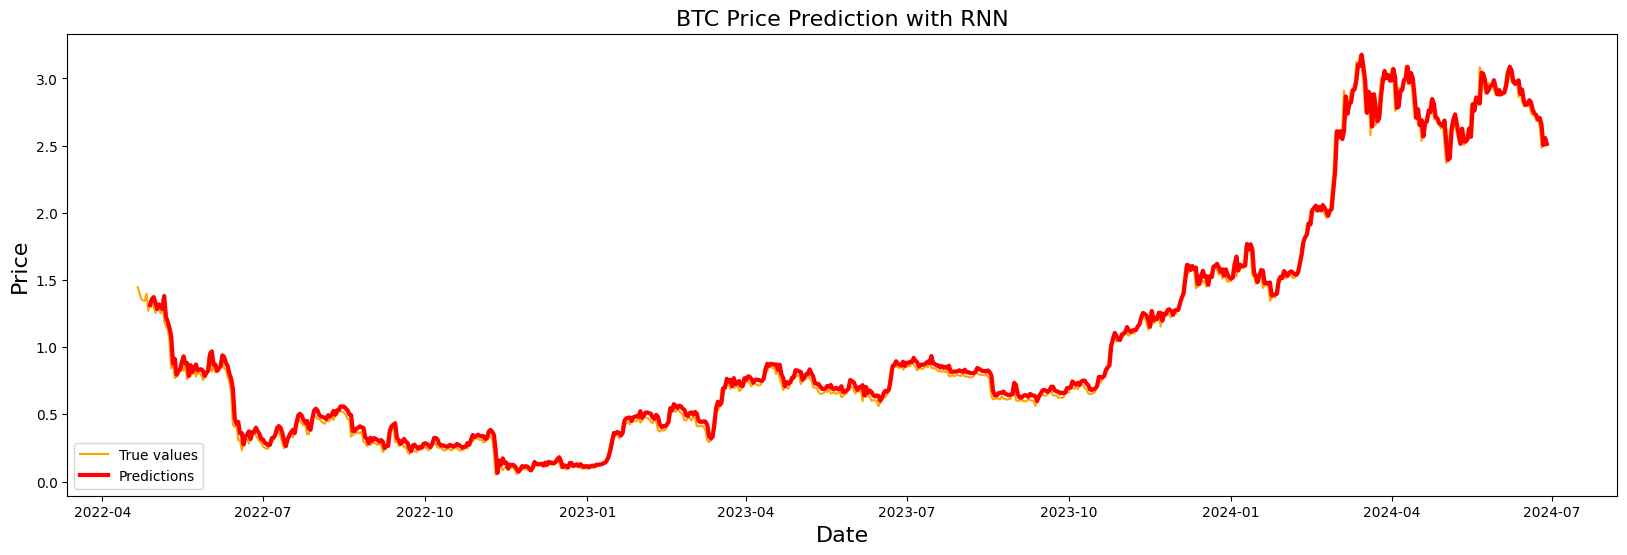

In [ ]:
plt.figure(figsize=(20, 6))

# Plot true values
plt.plot(test_data['date'], test_data['price'], c='orange', label='True values')

# Plot predicted values
plt.plot(X_test[sequence_length:], y_pred, lw=3, c='r', linestyle='-', label='Predictions')

# Add legend
plt.legend(loc="lower left")

# Set labels and title
plt.xlabel("Date", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.title("BTC Price Prediction with RNN", fontsize=16)

# Display the plot
plt.show()

# XGBoost

In [ ]:
data

,date,price,year,trend,seasonal
0,2013-04-28 00:00:00+00:00,-0.799575,2013,119.83175,3.681329
1,2013-04-29 00:00:00+00:00,-0.799212,2013,119.83175,24.038126
2,2013-04-30 00:00:00+00:00,-0.799575,2013,119.83175,24.035353
3,2013-05-01 00:00:00+00:00,-0.800571,2013,119.83175,9.176753
4,2013-05-02 00:00:00+00:00,-0.801311,2013,119.83175,-85.971183
...,...,...,...,...,...
4073,2024-06-24 00:00:00+00:00,2.637346,2024,66658.59902,110.322029
4074,2024-06-25 00:00:00+00:00,2.481636,2024,66658.59902,112.739365
4075,2024-06-26 00:00:00+00:00,2.558299,2024,66658.59902,145.270241
4076,2024-06-27 00:00:00+00:00,2.502701,2024,66658.59902,173.480907


In [ ]:
import xgboost as xgb  # Importing XGBoost library

def create_features(df, label=None):
    """
    Creates time series features from datetime index

    Parameters:
    - df: DataFrame containing a 'date' column of datetime type.
    - label: Optional, name of the target variable column if present in df.

    Returns:
    - X: DataFrame of extracted features.
    - y: Series of target variable if label is provided, otherwise just X.
    """
    X = pd.DataFrame()  # Initialize an empty DataFrame for features

    # Extract various datetime features
    X['hour'] = df['date'].dt.hour
    X['dayofweek'] = df['date'].dt.dayofweek
    X['quarter'] = df['date'].dt.quarter
    X['month'] = df['date'].dt.month
    X['year'] = df['date'].dt.year
    X['dayofyear'] = df['date'].dt.dayofyear
    X['dayofmonth'] = df['date'].dt.day
    X['weekofyear'] = df['date'].dt.isocalendar().week

    if label:
        y = df[label]  # Extract target variable if provided
        return X, y
    else:
        return X  # Return only features if no target variable is specified

### Explantion:

1. **Imports**:
   - `import xgboost as xgb`: Imports the XGBoost library for gradient boosting.

2. **Function Definition**:
   - **Parameters**:
     - `df`: The DataFrame containing a datetime column named 'date'.
     - `label` (optional): If provided, specifies the column name from which to extract the target variable (`y`).

   - **Function Body**:
     - **Feature Creation**:
       - `X = pd.DataFrame()`: Initializes an empty DataFrame `X` to store the extracted features.
       - Feature Extraction:
         - `X['hour'] = df['date'].dt.hour`: Extracts the hour of the day from the 'date' column.
         - `X['dayofweek'] = df['date'].dt.dayofweek`: Extracts the day of the week (Monday=0, Sunday=6).
         - `X['quarter'] = df['date'].dt.quarter`: Extracts the quarter of the year.
         - `X['month'] = df['date'].dt.month`: Extracts the month.
         - `X['year'] = df['date'].dt.year`: Extracts the year.
         - `X['dayofyear'] = df['date'].dt.dayofyear`: Extracts the day of the year.
         - `X['dayofmonth'] = df['date'].dt.day`: Extracts the day of the month.
         - `X['weekofyear'] = df['date'].dt.isocalendar().week`: Extracts the ISO week number of the year.

     - **Return Statement**:
       - If `label` is provided (`if label:`), the function also returns `y`, which is the column specified by `label` in the DataFrame `df`.
       - Returns `X` DataFrame containing all extracted features.

In [ ]:
# Using the create_features function to extract features and target variables
X_train, y_train = create_features(train_data, label='price')
X_test, y_test = create_features(test_data, label='price')

### Explantion:
- `train_data` and `test_data` are assumed to be DataFrames containing a 'date' column of datetime type and a 'price' column representing the target variable.
- `create_features(train_data, label='price')` extracts features (`X_train`) and the target variable (`y_train`) for training data.
- Similarly, `create_features(test_data, label='price')` extracts features (`X_test`) and the target variable (`y_test`) for testing data.


In [ ]:
import xgboost as xgb

# Define the XGBoost regressor model with specified parameters
model = xgb.XGBRegressor(objective='reg:linear',
                         min_child_weight=10,
                         booster='gbtree',
                         colsample_bytree=0.3,
                         learning_rate=0.001,
                         max_depth=5,
                         alpha=10,
                         n_estimators=1000)

# Train the model on training data
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and Mean Absolute Percentage Error (MAPE)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print evaluation metrics
print('Mean Squared Error:', mse)
print('Mean Absolute Percentage Error:', mape * 100)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:38:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Mean Squared Error: 1.4319983635183757
Mean Absolute Percentage Error: 73.58524584556068


### Explanation:
1. **XGBoost Regressor Setup**:
   - `xgb.XGBRegressor`: Initializes an XGBoost regressor for regression tasks (`objective='reg:linear'`).
   - Parameters such as `min_child_weight`, `colsample_bytree`, `learning_rate`, `max_depth`, `alpha`, and `n_estimators` are tuned to control the model's complexity, learning rate, and regularization.

2. **Training**:
   - `model.fit(X_train, y_train)`: Trains the XGBoost model using training data (`X_train` for features, `y_train` for target).

3. **Prediction**:
   - `model.predict(X_test)`: Generates predictions on the test data (`X_test`).

4. **Evaluation**:
   - `mean_squared_error(y_test, y_pred)`: Computes the MSE between true test labels (`y_test`) and predicted values (`y_pred`).
   - `mean_absolute_percentage_error(y_test, y_pred)`: Computes the MAPE between true test labels and predicted values.

5. **Output**:
   - Prints the computed MSE and MAPE, which are metrics commonly used to evaluate regression model performance.

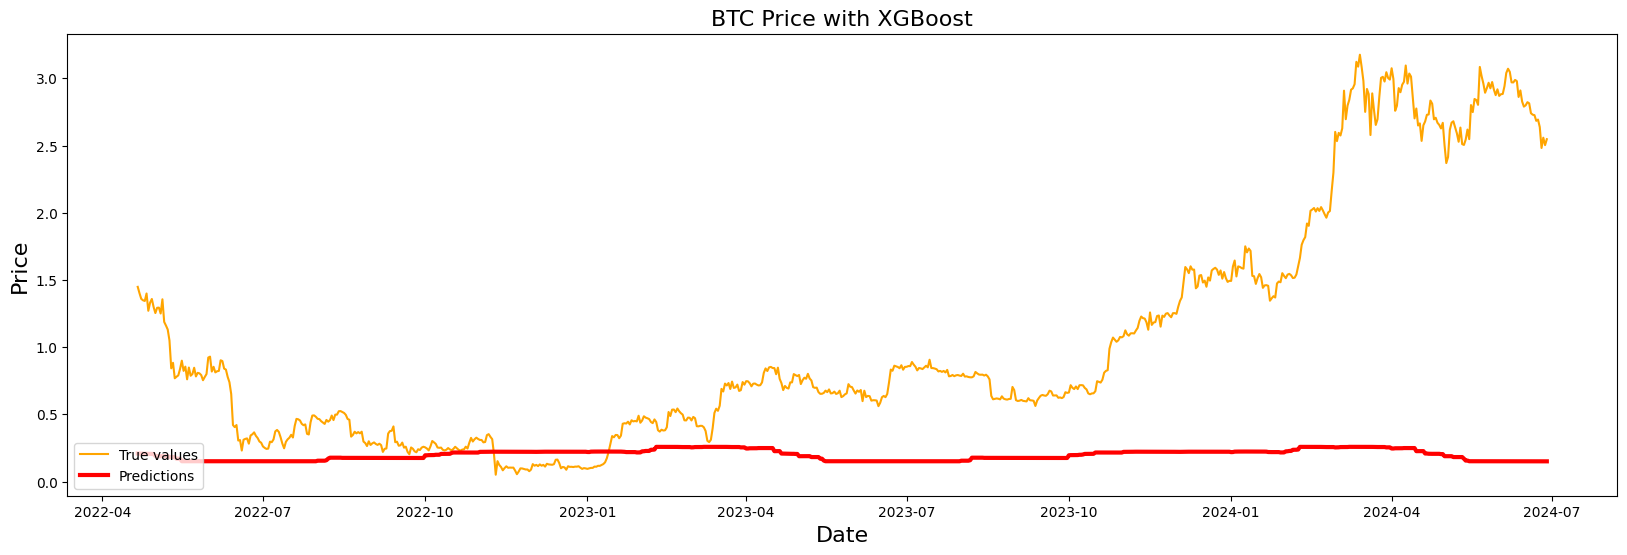

In [ ]:
plt.figure(figsize=(20, 6))

# Plot true values
plt.plot(test_data['date'], test_data['price'], c='orange', label='True values')

# Plot predictions
plt.plot(test_data['date'], y_pred, lw=3, c='r', linestyle='-', label='Predictions')

# Configure plot
plt.legend(loc="lower left")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.title("BTC Price with XGBoost", fontsize=16)

# Show plot
plt.show()

## Add more features

In [ ]:
import xgboost as xgb

def add_features(X, df):
    """
    Add trend and seasonal features to the dataset X.
    """
    X['trend'] = df['trend']
    X['seasonal'] = df['seasonal']

    return X

### Explanation:
- **Function Purpose**: `add_features` is a function designed to enhance the feature set (`X`) by incorporating additional columns from another DataFrame (`df`), specifically columns named `'trend'` and `'seasonal'`.
  
- **Parameters**:
  - `X`: This represents the DataFrame where you want to add the new features (`'trend'` and `'seasonal'`).
  - `df`: This is the DataFrame containing the columns `'trend'` and `'seasonal'` that you wish to add to `X`.

- **Returns**:
  - `X`: The modified DataFrame with the new features added (`'trend'` and `'seasonal'`).

In [ ]:
# Assuming X_train and X_test are already defined
X_train = add_features(X_train, train_data)
X_test = add_features(X_test, test_data)

In [ ]:
# Define the model
model = xgb.XGBRegressor(min_child_weight=10, booster='gbtree', colsample_bytree=0.3, learning_rate=0.001,
                         max_depth=10, alpha=10, n_estimators=100000)

# Fit the model
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=False)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print evaluation metrics
print('Mean Squared Error:', mse)
print('Mean Absolute Percentage Error:', mape * 100)

Mean Squared Error: 0.26952868025135174
Mean Absolute Percentage Error: 132.39276170306476


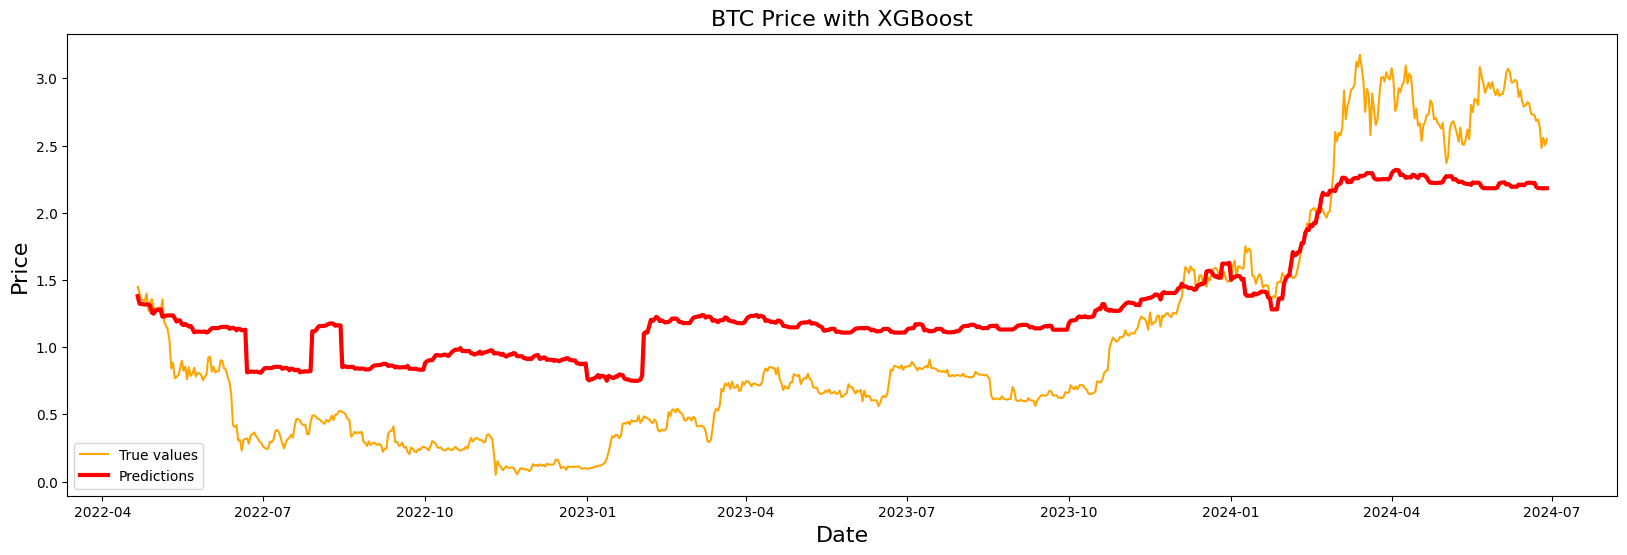

In [ ]:
# Set up the figure size for the plot
plt.figure(figsize=(20, 6))

# Plotting the true values from test_data
plt.plot(test_data['date'], test_data['price'], c='orange', label='True values')

# Plotting the predictions (y_pred) from the XGBoost model
plt.plot(test_data['date'], y_pred, lw=3, c='r', linestyle='-', label='Predictions')

# Adding legend to the plot at the lower left corner
plt.legend(loc="lower left")

# Labeling the x-axis with "Date" and setting font size
plt.xlabel("Date", fontsize=16)

# Labeling the y-axis with "Price" and setting font size
plt.ylabel("Price", fontsize=16)

# Setting the title of the plot to "BTC Price with XGBoost" and setting font size
plt.title("BTC Price with XGBoost", fontsize=16)

# Display the plot
plt.show()

In [ ]:
def add_lag_features(X, data):
    # Adding lagged features for 'price'
    X['lag_1'] = data['price'].shift(1)  # Lag 1: previous day's price
    X['lag_2'] = data['price'].shift(2)  # Lag 2: price two days ago
    X['lag_3'] = data['price'].shift(3)  # Lag 3: price three days ago
    X['lag_4'] = data['price'].shift(4)  # Lag 4: price four days ago
    X['lag_5'] = data['price'].shift(5)  # Lag 5: price five days ago
    X['lag_6'] = data['price'].shift(6)  # Lag 6: price six days ago
    X['lag_7'] = data['price'].shift(7)  # Lag 7: price seven days ago

    return X


### Explanation:
- **Parameters**:
  - `X`: DataFrame where lagged features will be added.
  - `data`: DataFrame containing the original time series data, including the 'price' series.

- **Returns**:
  - Modified DataFrame `X` with added lagged features.

- **Functionality**:
  - The function iterates through lagged periods (from 1 to 7 days) of the 'price' series and adds them as new columns to `X`. Each lagged feature represents the price value from the specified number of days before the current date.

### Usage:
To use this function, you would typically call it after creating your initial features from the time series data, possibly after splitting into training and test sets.

In [ ]:
# Assuming X_train and X_test are already created from previous feature engineering steps
X_train = add_lag_features(X_train, train_data)
X_test = add_lag_features(X_test, test_data)

In [ ]:
# Define an XGBoost regressor model with specified hyperparameters
model =  xgb.XGBRegressor(min_child_weight=10, booster='gbtree', colsample_bytree = 0.3, learning_rate = 0.001,
                max_depth = 10, alpha = 10, n_estimators = 100000)

# Train the model on X_train and y_train
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model's performance using Mean Squared Error (MSE) and Mean Absolute Percentage Error (MAPE)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print the computed MSE and MAPE as performance metrics
print('Mean Squared Error:', mse)
print('Mean Absolute Percentage Error:', mape*100)

Mean Squared Error: 0.05691396456881324
Mean Absolute Percentage Error: 26.72216120551503


Text(0.5, 1.0, 'BTC Price with XGBoost')

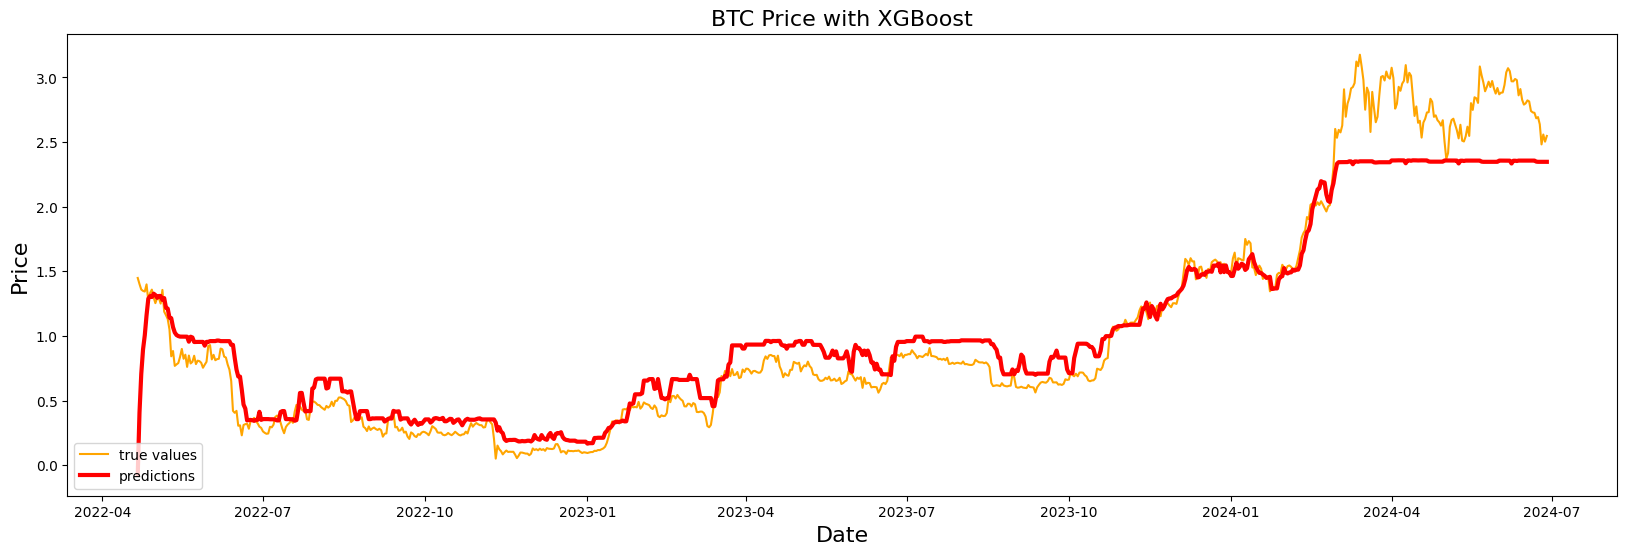

In [ ]:
plt.figure(figsize=(20,6))  # Set the figure size to 20 inches wide and 6 inches tall
plt.plot(test_data['date'], test_data['price'], c='orange', label='true values')  # Plot the true BTC prices in orange
plt.plot(test_data['date'], y_pred, lw=3, c='r', linestyle='-', label='predictions')  # Plot the predicted BTC prices in red with a line width of 3
plt.legend(loc="lower left")  # Add a legend and place it in the lower left corner
plt.xlabel("Date", fontsize=16)  # Set the x-axis label to "Date" with a font size of 16
plt.ylabel("Price", fontsize=16)  # Set the y-axis label to "Price" with a font size of 16
plt.title("BTC Price with XGBoost", fontsize=16)  # Set the title of the plot to "BTC Price with XGBoost" with a font size of 16